<div style="font-family: 'Poppins'; font-weight: bold; letter-spacing: 0px; color: #FFFFFF; font-size: 300%; text-align: left; padding: 15px; background: #0A0F29; border: 8px solid #00FFFF; border-radius: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5);">
    Heart Disease Prediction with R<br>
</div>

<a href="https://imgur.com/o9LJyv1"><img src="https://i.imgur.com/o9LJyv1.jpg" title="source: imgur.com" /></a>

Photo de <a href="https://unsplash.com/fr/@priscilladupreez?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Priscilla Du Preez 🇨🇦</a> sur <a href="https://unsplash.com/fr/photos/bonbons-ronds-blancs-et-bruns-dans-un-bol-en-ceramique-blanche-APi4yVE_rUQ?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Introduction</div>

This notebook presents a comprehensive analysis and machine learning approach to predict heart disease using the UCI Heart Disease dataset. The dataset contains various medical predictor variables and one target variable, making it an excellent resource for binary classification tasks in healthcare analytics.

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Dataset Overview</div>

- Source: UCI Machine Learning Repository
- Target Variable: Presence of heart disease (binary: 0 = heart disease, 1 = asymptomatic/healthy)
- Features: 13 medical attributes including age, sex, chest pain type, blood pressure, etc.

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Tutorial Objectives</div>

- Data preprocessing and exploratory data analysis
- Feature engineering and selection
- Model development using multiple algorithms
- Model evaluation and interpretation

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">1. Setup and Data Loading</div>

In [1]:
# Load required packages
# For data manipulation and visualization

suppressPackageStartupMessages(library(tidyverse))      

# For automated EDA (Exploratory Data Analysis)
suppressPackageStartupMessages(library(DataExplorer))   

# For plot arrangements
suppressPackageStartupMessages(library(gridExtra))      

# For publication-ready plots
suppressPackageStartupMessages(library(ggpubr))         

# For correlation analysis
suppressPackageStartupMessages(library(GGally))        

# For modeling workflow
suppressPackageStartupMessages(library(tidymodels))    

# For handling class imbalance
suppressPackageStartupMessages(library(themis))        

# For variable importance
suppressPackageStartupMessages(library(vip))           

# For model versioning
suppressPackageStartupMessages(library(vetiver))       

# For feature engineering
suppressPackageStartupMessages(library(recipes))       

# For gradient boosting
suppressPackageStartupMessages(library(xgboost))     

# Load required libraries
library(tidymodels)
library(themis)
library(ranger)
library(xgboost)
library(doParallel)
library(R.utils)


# Enable parallel processing with specific number of cores

suppressPackageStartupMessages(library(doParallel))
suppressPackageStartupMessages(library(ranger))
suppressPackageStartupMessages(library(R.utils))

# Read the dataset
heart_data <- read_csv("/kaggle/input/heart.csv")

# Initial glimpse of the data
glimpse(heart_data)

Loading required package: foreach




Attaching package: ‘foreach’




The following objects are masked from ‘package:purrr’:

    accumulate, when




Loading required package: iterators



Loading required package: parallel



Loading required package: R.oo



Loading required package: R.methodsS3



R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.



R.oo v1.26.0 (2024-01-24 05:12:50 UTC) successfully loaded. See ?R.oo for help.




Attaching package: ‘R.oo’




The following object is masked from ‘package:R.methodsS3’:

    throw




The following object is masked from ‘package:recipes’:

    check




The following object is masked from ‘package:dials’:

    finalize




The following objects are masked from ‘package:methods’:

    getClasses, getMethods




The following objects are masked from ‘package:base’:

    attach, detach, load, save




R.utils v2.12.3 (2023-11-18 01:00:02 UTC) successfully loaded. See ?R.utils for help.




Attaching package: ‘R.utils’




The following object is masked from ‘package:GGally’:

    wrap




The following object is masked from ‘package:tidyr’:

    extract




The following object is masked from ‘package:utils’:

    timestamp




The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, use, warnings




Rows: 303 Columns: 14


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 303
Columns: 14
$ age      <dbl> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5…
$ sex      <dbl> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1…
$ cp       <dbl> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0…
$ trestbps <dbl> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1…
$ chol     <dbl> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1…
$ thalach  <dbl> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1…
$ exang    <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0…
$ slope    <dbl> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1…
$ ca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0…
$ thal     <dbl> 1

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">2. Data Preprocessing</div>

In [2]:
# Clean and preprocess the data
heart_processed <- heart_data |>
  # Remove invalid entries (thal=0 and ca=4 are considered missing values in the original dataset)
  filter(thal != 0 & ca != 4) |>
  
  # Convert categorical variables to meaningful factors
  mutate(
    # Sex (1 = male; 0 = female)
    sex = factor(case_when(
      sex == 0 ~ "female",
      sex == 1 ~ "male"
    )),
    
    # Target variable (1 = healthy; 0 = heart disease)
    target = factor(case_when(
      target == 1 ~ "healthy",
      target == 0 ~ "heart_disease"
    ), levels = c("heart_disease", "healthy")), # Set reference level
    
    # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    fbs = factor(case_when(
      fbs == 0 ~ "<=120",
      fbs == 1 ~ ">120"
    )),
    
    # Exercise induced angina (1 = yes; 0 = no)
    exang = factor(case_when(
      exang == 0 ~ "no",
      exang == 1 ~ "yes"
    )),
    
    # Chest pain type
    cp = factor(case_when(
      cp == 0 ~ "asymptomatic",
      cp == 1 ~ "atypical_angina",
      cp == 2 ~ "non_anginal",
      cp == 3 ~ "typical_angina"
    )),
    
    # Resting electrocardiographic results
    restecg = factor(case_when(
      restecg == 0 ~ "hypertrophy",
      restecg == 1 ~ "normal",
      restecg == 2 ~ "wave_abnormality"
    )),
    
    # ST segment slope during peak exercise
    slope = factor(case_when(
      slope == 0 ~ "downsloping",
      slope == 1 ~ "flat",
      slope == 2 ~ "upsloping"
    )),
    
    # Thalium stress test results
    thal = factor(case_when(
      thal == 1 ~ "fixed_defect",
      thal == 2 ~ "normal",
      thal == 3 ~ "reversable_defect"
    )),
    
    # Number of major vessels colored by flouroscopy
    ca = factor(ca)
  )

# Verify the preprocessing
glimpse(heart_processed)

# Display summary statistics
summary(heart_processed)

# Check for any remaining missing values
colSums(is.na(heart_processed))

Rows: 296
Columns: 14
$ age      <dbl> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5…
$ sex      <fct> male, male, female, male, female, male, female, male, male, m…
$ cp       <fct> typical_angina, non_anginal, atypical_angina, atypical_angina…
$ trestbps <dbl> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1…
$ chol     <dbl> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2…
$ fbs      <fct> >120, <=120, <=120, <=120, <=120, <=120, <=120, <=120, >120, …
$ restecg  <fct> hypertrophy, normal, hypertrophy, normal, normal, normal, hyp…
$ thalach  <dbl> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1…
$ exang    <fct> no, no, no, no, yes, no, no, no, no, no, no, no, no, yes, no,…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0…
$ slope    <fct> downsloping, downsloping, upsloping, upsloping, upsloping, fl…
$ ca       <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0…
$ thal     <fct> f

      age            sex                    cp         trestbps    
 Min.   :29.00   female: 95   asymptomatic   :141   Min.   : 94.0  
 1st Qu.:48.00   male  :201   atypical_angina: 49   1st Qu.:120.0  
 Median :56.00                non_anginal    : 83   Median :130.0  
 Mean   :54.52                typical_angina : 23   Mean   :131.6  
 3rd Qu.:61.00                                      3rd Qu.:140.0  
 Max.   :77.00                                      Max.   :200.0  
      chol          fbs                  restecg       thalach      exang    
 Min.   :126.0   <=120:253   hypertrophy     :145   Min.   : 71.0   no :199  
 1st Qu.:211.0   >120 : 43   normal          :147   1st Qu.:133.0   yes: 97  
 Median :242.5               wave_abnormality:  4   Median :152.5            
 Mean   :247.2                                      Mean   :149.6            
 3rd Qu.:275.2                                      3rd Qu.:166.0            
 Max.   :564.0                                      Max.

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal   target 
       0        0        0        0        0        0

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">3. Exploratory Data Analysis</div>

In [3]:
# Function for creating standardized visualization sets
create_eda_plots <- function(data) {
  # Demographics visualization
  demographic_plots <- list(
    age_dist = ggplot(data, aes(x = age, fill = sex)) +
      geom_histogram(binwidth = 5, position = "dodge") +
      theme_minimal() +
      labs(title = "Age Distribution by Gender"),
    
    gender_dist = ggplot(data, aes(x = sex, fill = target)) +
      geom_bar(position = "fill") +
      theme_minimal() +
      labs(title = "Disease Distribution by Gender")
  )
  
  # Clinical measurements visualization
  clinical_plots <- list(
    bp_dist = ggplot(data, aes(x = trestbps, fill = target)) +
      geom_density(alpha = 0.5) +
      theme_minimal() +
      labs(title = "Blood Pressure Distribution"),
    
    chol_dist = ggplot(data, aes(x = chol, fill = target)) +
      geom_density(alpha = 0.5) +
      theme_minimal() +
      labs(title = "Cholesterol Distribution")
  )
  
  list(
    demographic = demographic_plots,
    clinical = clinical_plots
  )
}

# Generate and display plots
eda_plots <- create_eda_plots(heart_processed)

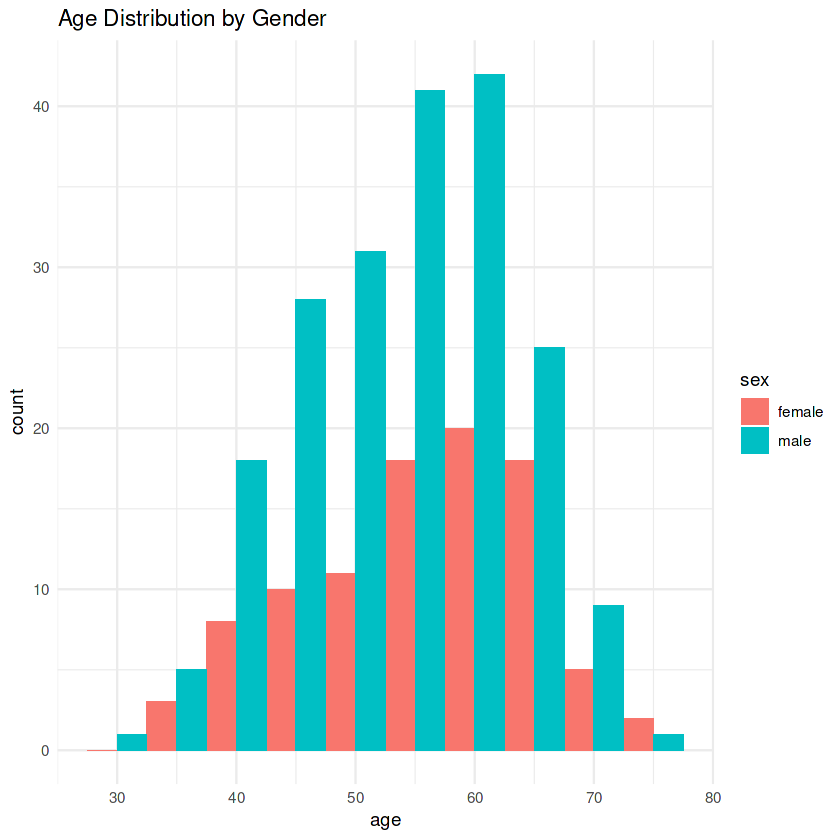

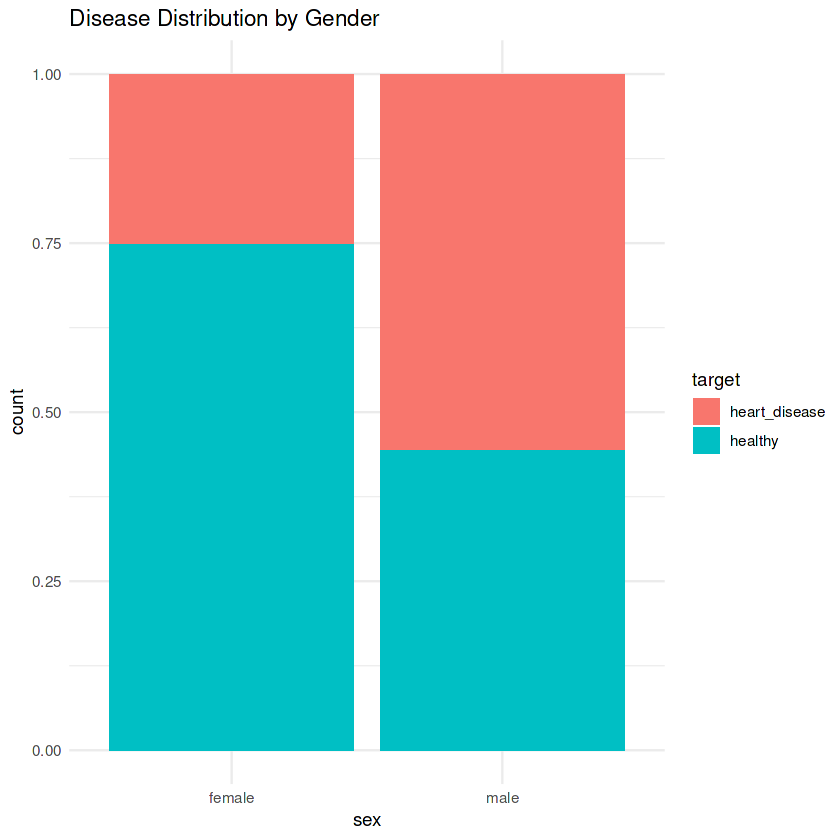

$demographic
$demographic$age_dist

$demographic$gender_dist


$clinical
$clinical$bp_dist

$clinical$chol_dist



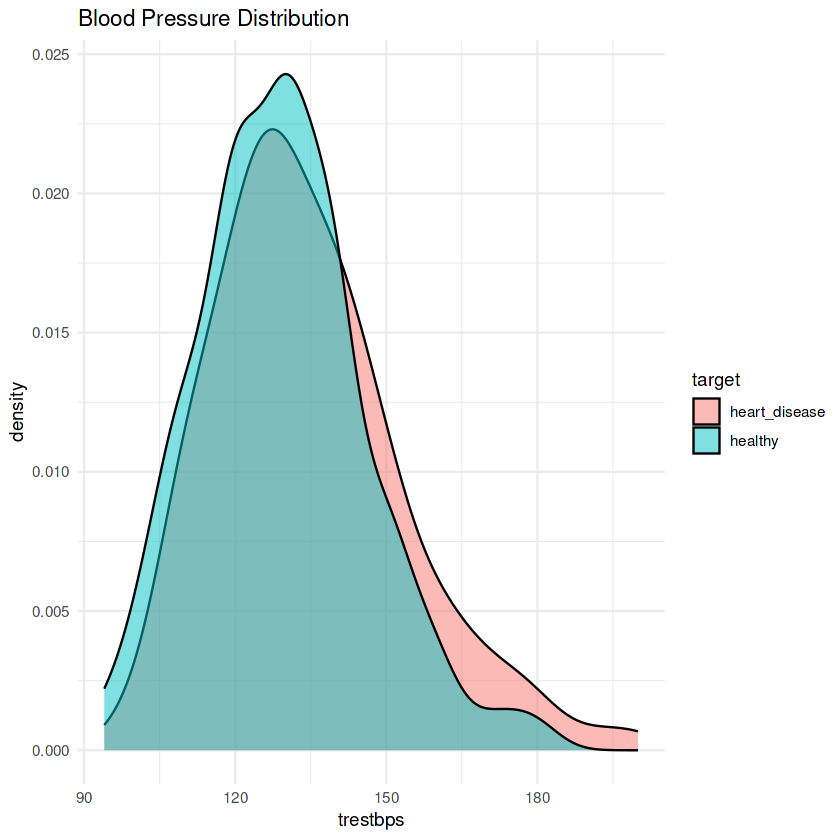

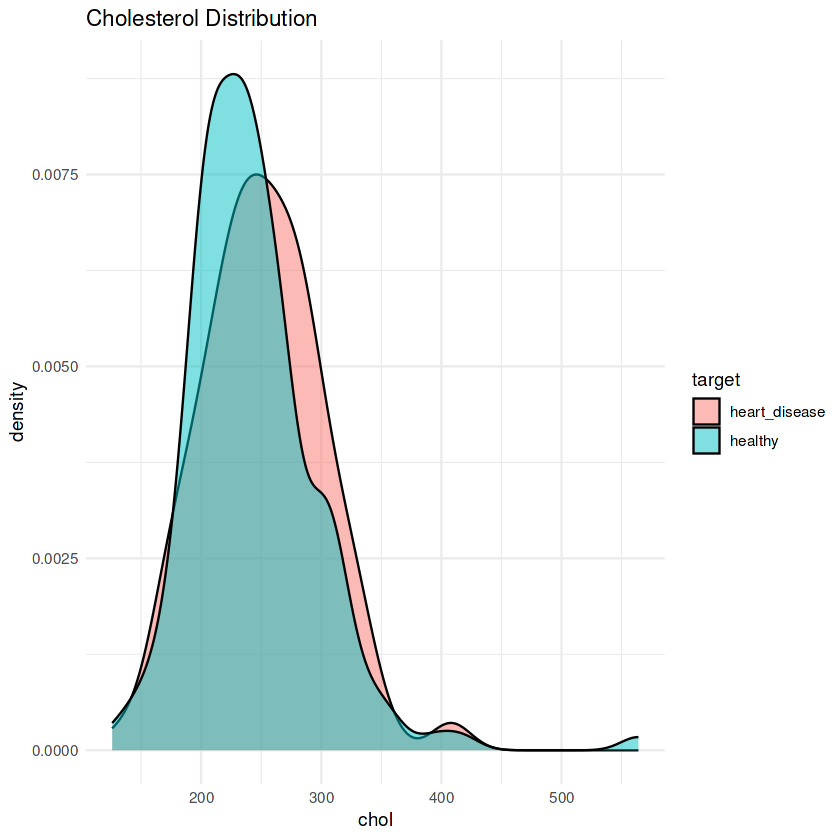

In [4]:
eda_plots

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">A Visualize the data summary and distribution of each variable</div>

In [5]:
heart_processed |>
  summary()

      age            sex                    cp         trestbps    
 Min.   :29.00   female: 95   asymptomatic   :141   Min.   : 94.0  
 1st Qu.:48.00   male  :201   atypical_angina: 49   1st Qu.:120.0  
 Median :56.00                non_anginal    : 83   Median :130.0  
 Mean   :54.52                typical_angina : 23   Mean   :131.6  
 3rd Qu.:61.00                                      3rd Qu.:140.0  
 Max.   :77.00                                      Max.   :200.0  
      chol          fbs                  restecg       thalach      exang    
 Min.   :126.0   <=120:253   hypertrophy     :145   Min.   : 71.0   no :199  
 1st Qu.:211.0   >120 : 43   normal          :147   1st Qu.:133.0   yes: 97  
 Median :242.5               wave_abnormality:  4   Median :152.5            
 Mean   :247.2                                      Mean   :149.6            
 3rd Qu.:275.2                                      3rd Qu.:166.0            
 Max.   :564.0                                      Max.

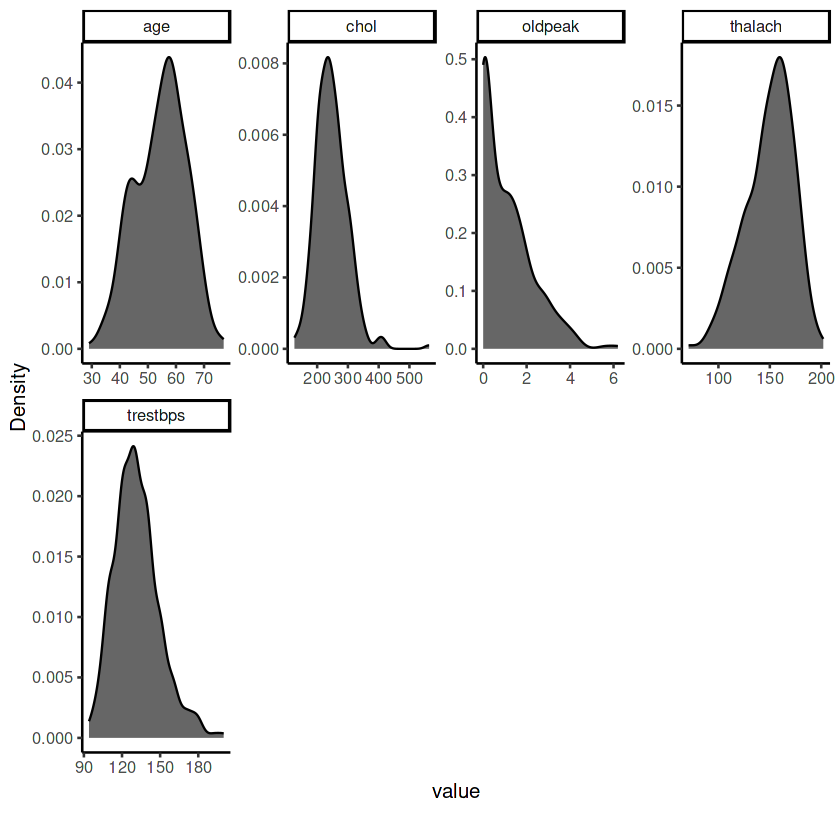

In [6]:
plot_density(heart_processed, ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

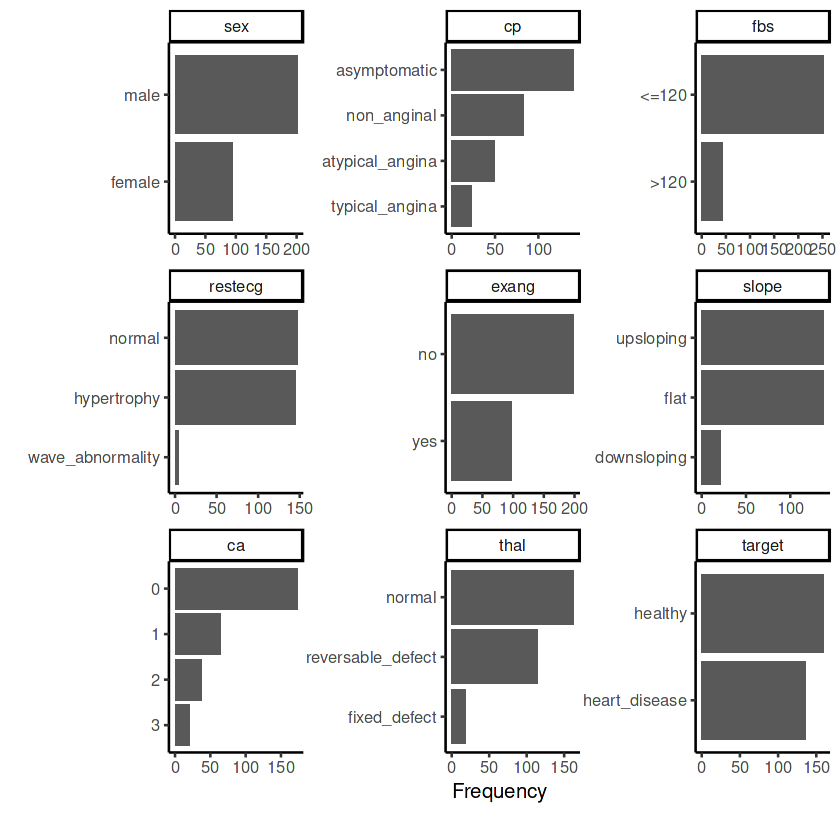

In [7]:
plot_bar(heart_processed, ggtheme = theme_classic2())

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">B Analyze each variable per gender</div>

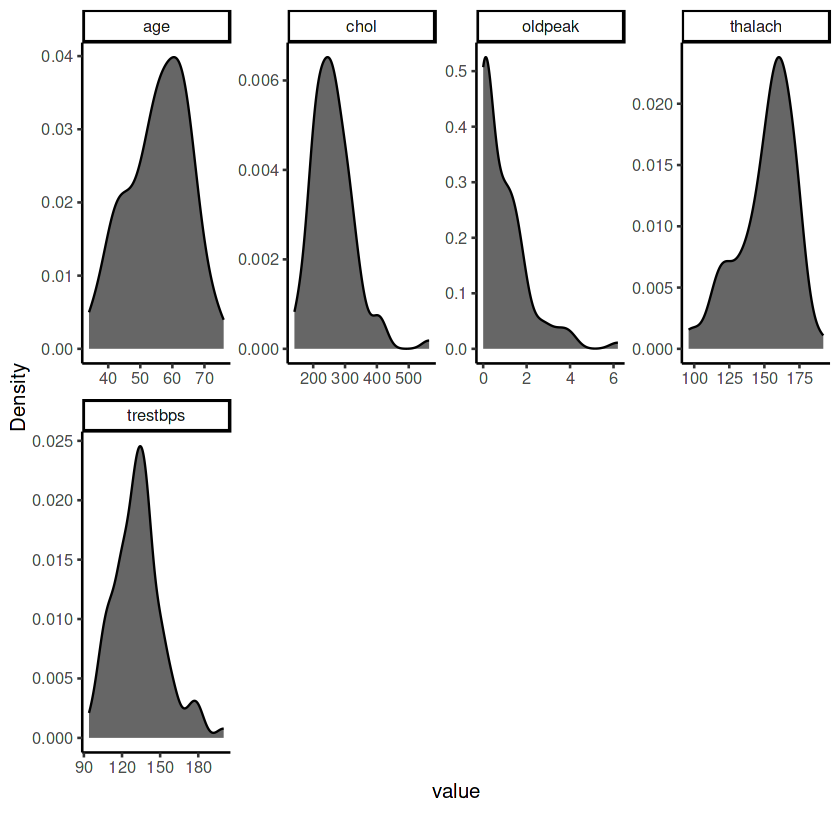

In [8]:
heart_processed |>
  filter(sex == "female") |>
  plot_density(ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

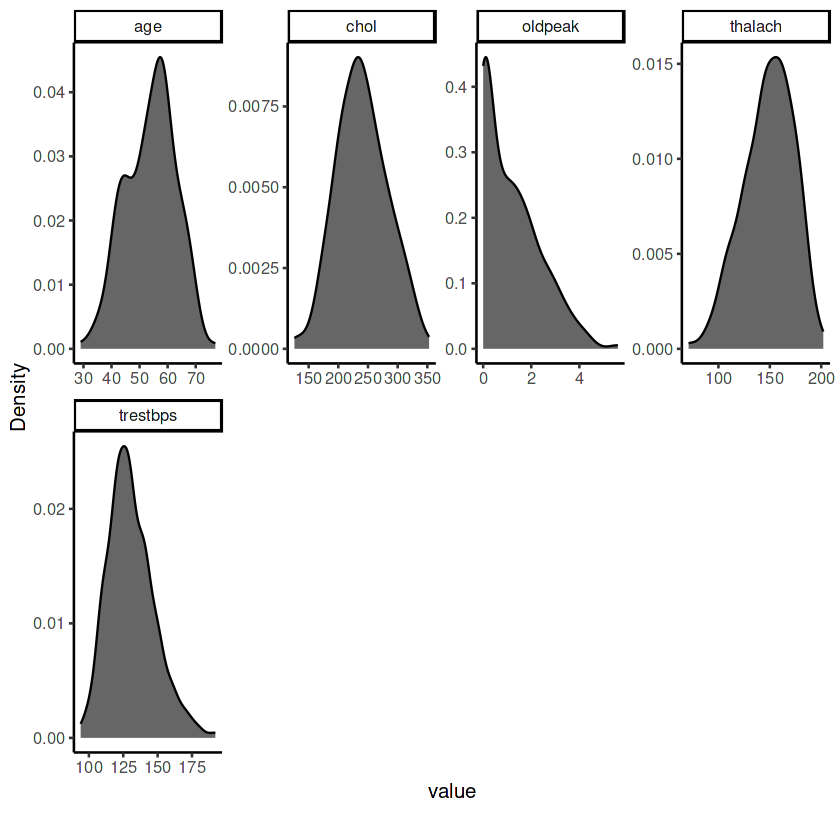

In [9]:
heart_processed |>
  filter(sex == "male") |>
  plot_density(ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

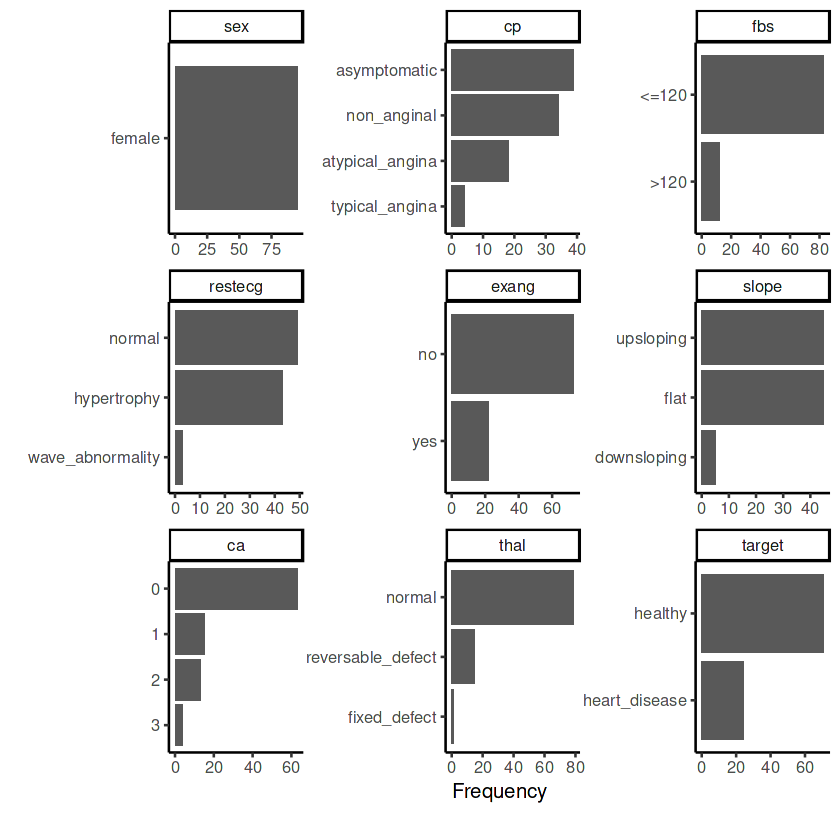

In [10]:
heart_processed |>
  filter(sex == "female") |>
  plot_bar(ggtheme = theme_classic2())

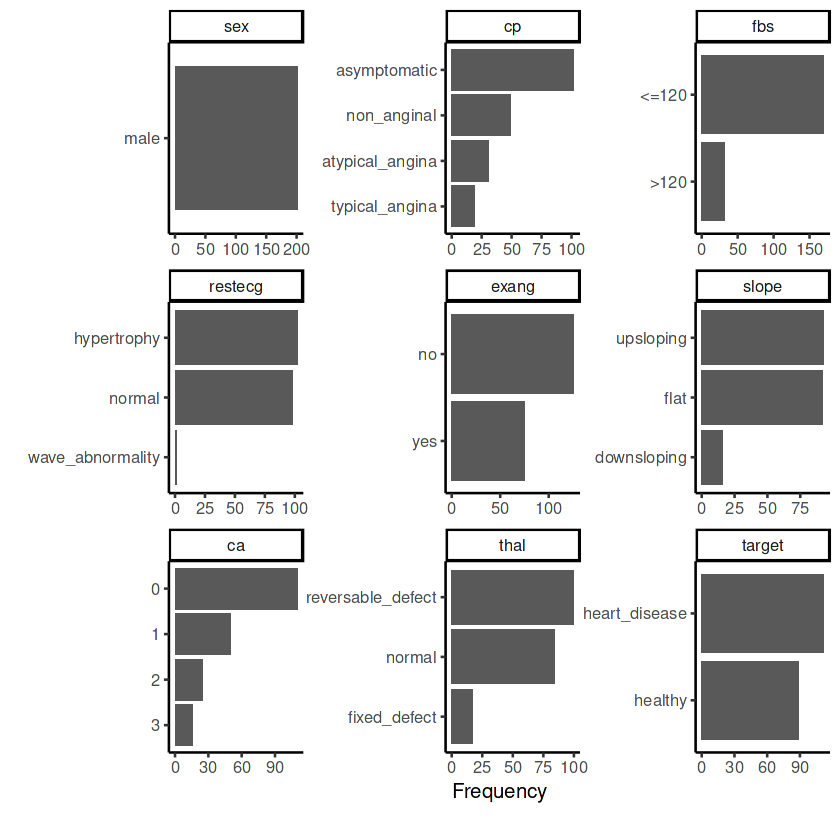

In [11]:
heart_processed |>
  filter(sex == "male") |>
  plot_bar(ggtheme = theme_classic2())

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">C Visualize variables per disease status</div>

In [12]:
heart_processed |> head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,male,typical_angina,145,233,>120,hypertrophy,150,no,2.3,downsloping,0,fixed_defect,healthy
37,male,non_anginal,130,250,<=120,normal,187,no,3.5,downsloping,0,normal,healthy
41,female,atypical_angina,130,204,<=120,hypertrophy,172,no,1.4,upsloping,0,normal,healthy
56,male,atypical_angina,120,236,<=120,normal,178,no,0.8,upsloping,0,normal,healthy
57,female,asymptomatic,120,354,<=120,normal,163,yes,0.6,upsloping,0,normal,healthy
57,male,asymptomatic,140,192,<=120,normal,148,no,0.4,flat,0,fixed_defect,healthy


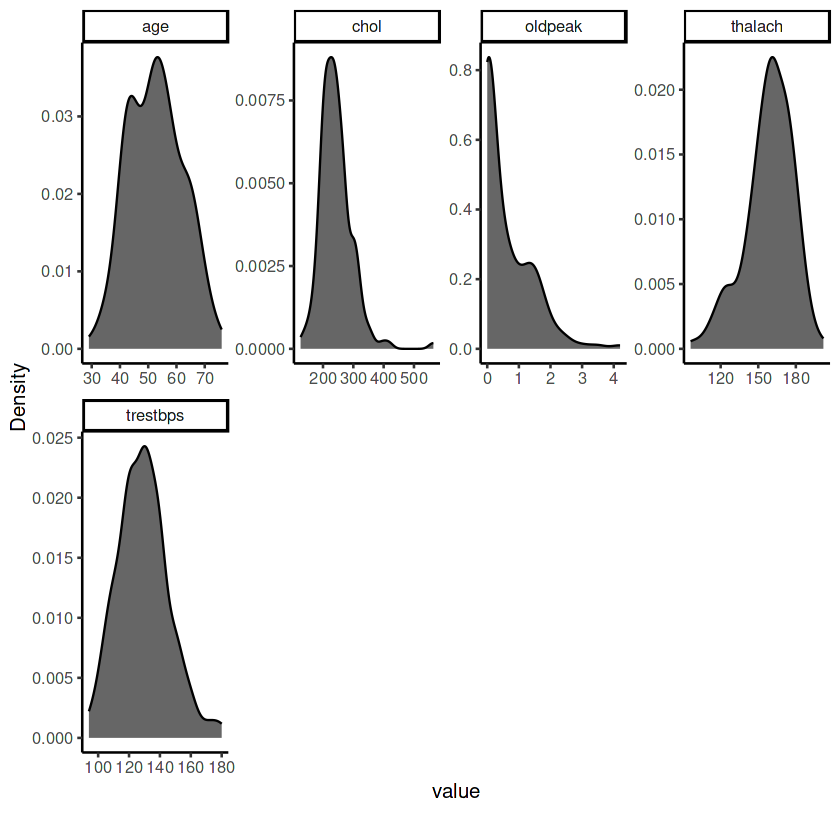

In [13]:
heart_processed |>
  filter(target == "healthy") |>
  plot_density(ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

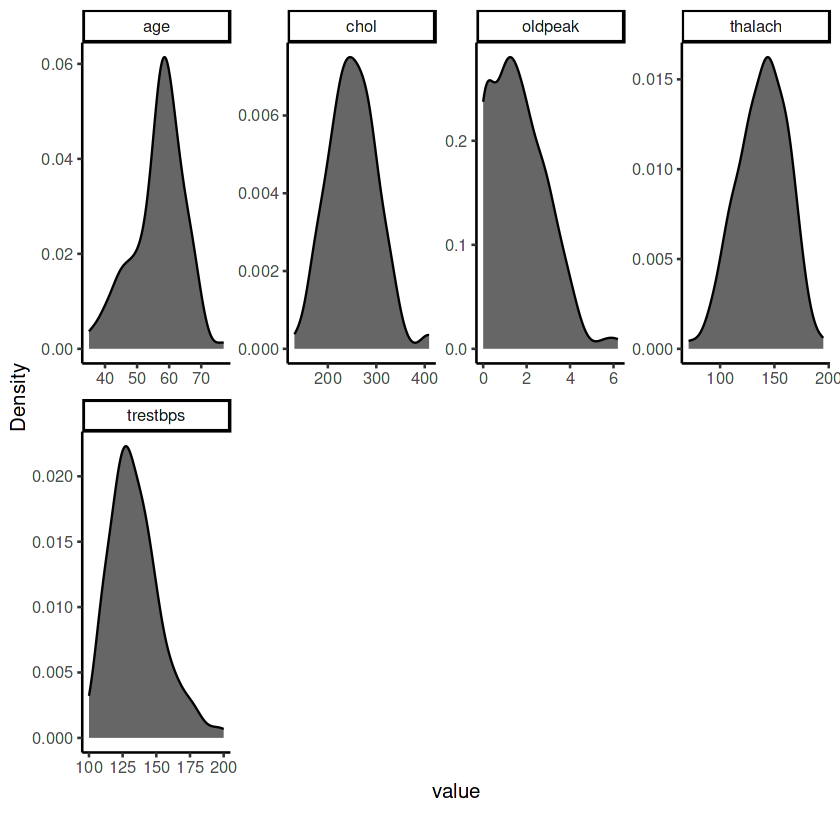

In [14]:
heart_processed |>
  filter(target == "heart_disease") |>
  plot_density(ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

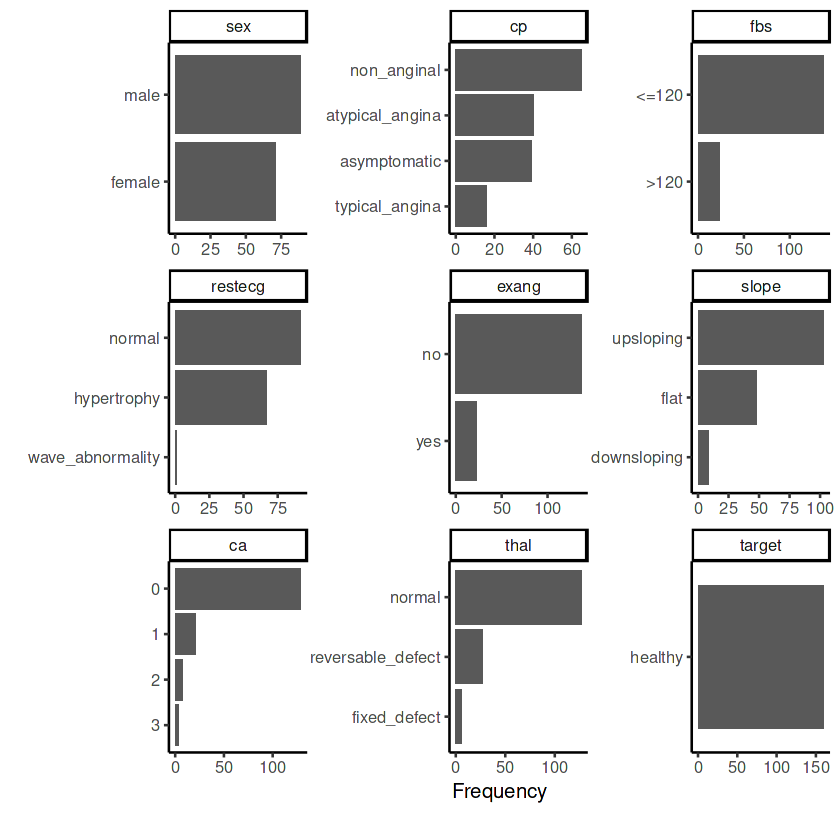

In [15]:
heart_processed |>
  filter(target == "healthy") |>
  plot_bar(ggtheme = theme_classic2())

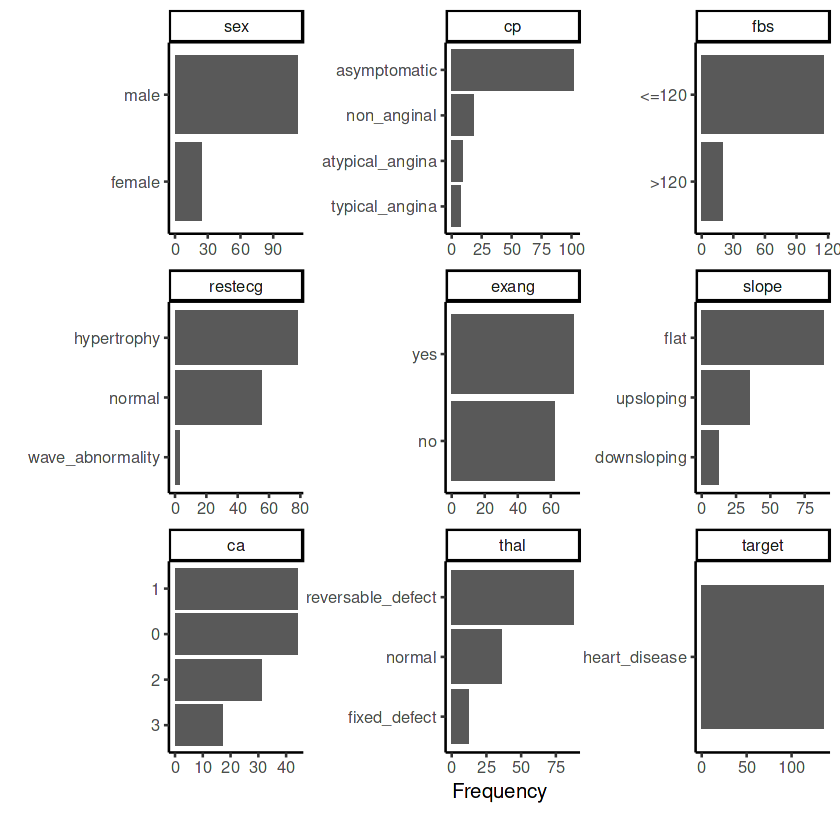

In [16]:
heart_processed |>
  filter(target == "heart_disease") |>
  plot_bar(ggtheme = theme_classic2())

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Visualize the data per gender and disease status</div>

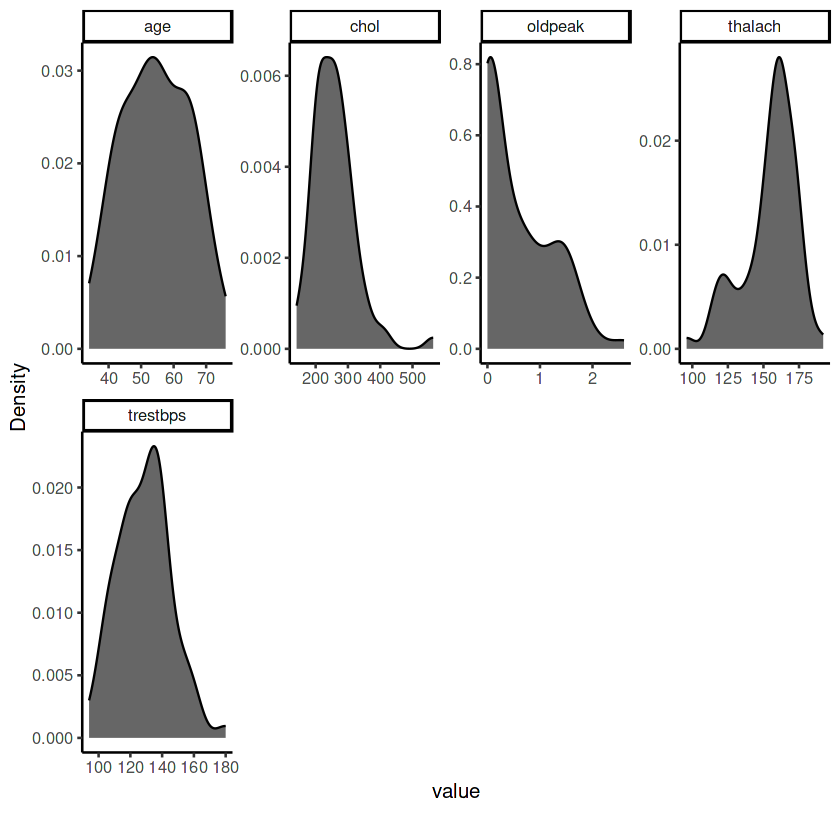

In [17]:
heart_processed |>
  filter(sex == "female", target == "healthy") |>
  plot_density(ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

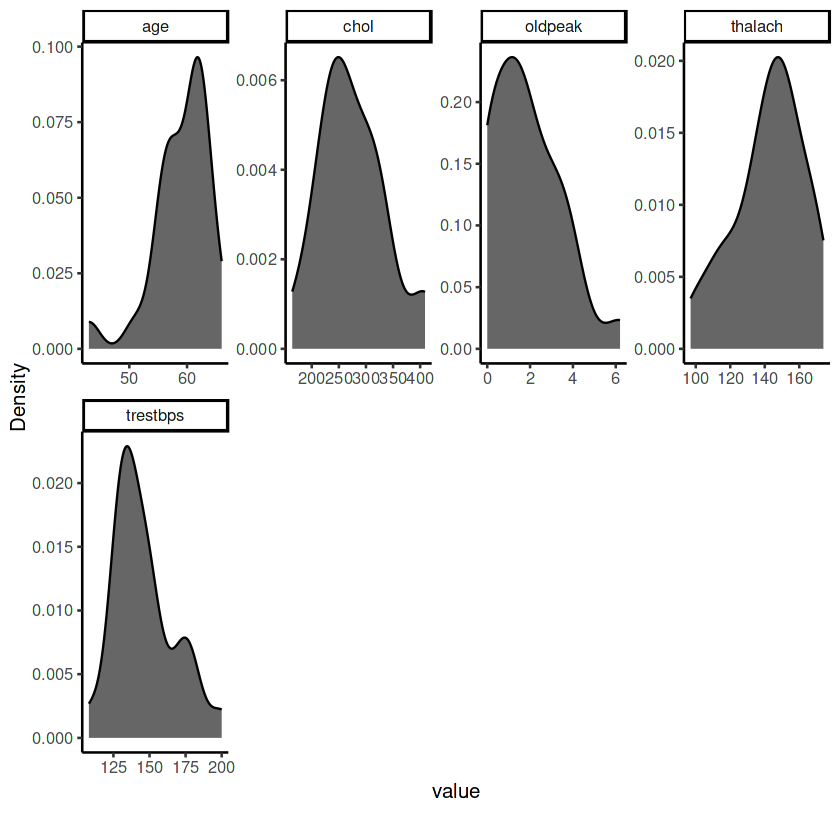

In [18]:
heart_processed |>
  filter(sex == "female", target == "heart_disease") |>
  plot_density(ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

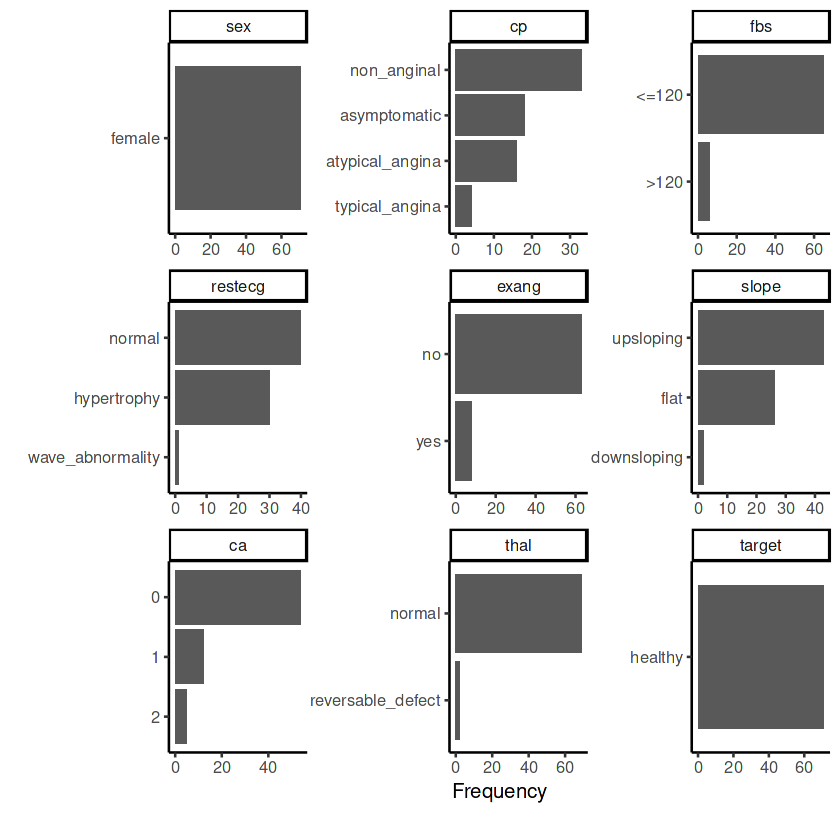

In [19]:
heart_processed |>
  filter(sex == "female", target == "healthy") |>
  plot_bar(ggtheme = theme_classic2())

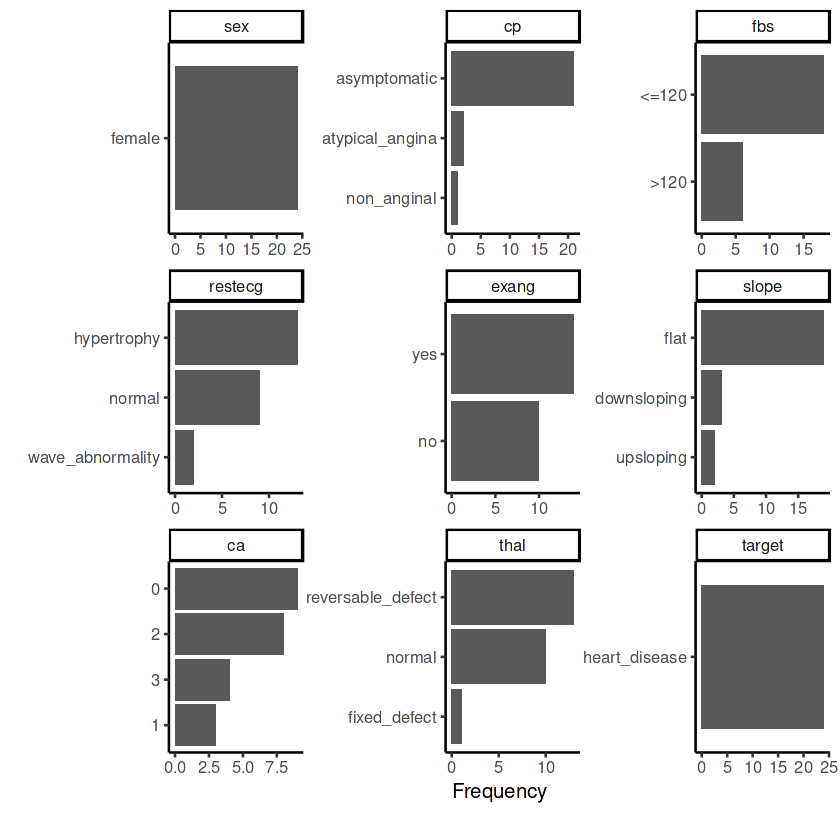

In [20]:
heart_processed |>
  filter(sex == "female", target == "heart_disease") |>
  plot_bar(ggtheme = theme_classic2())

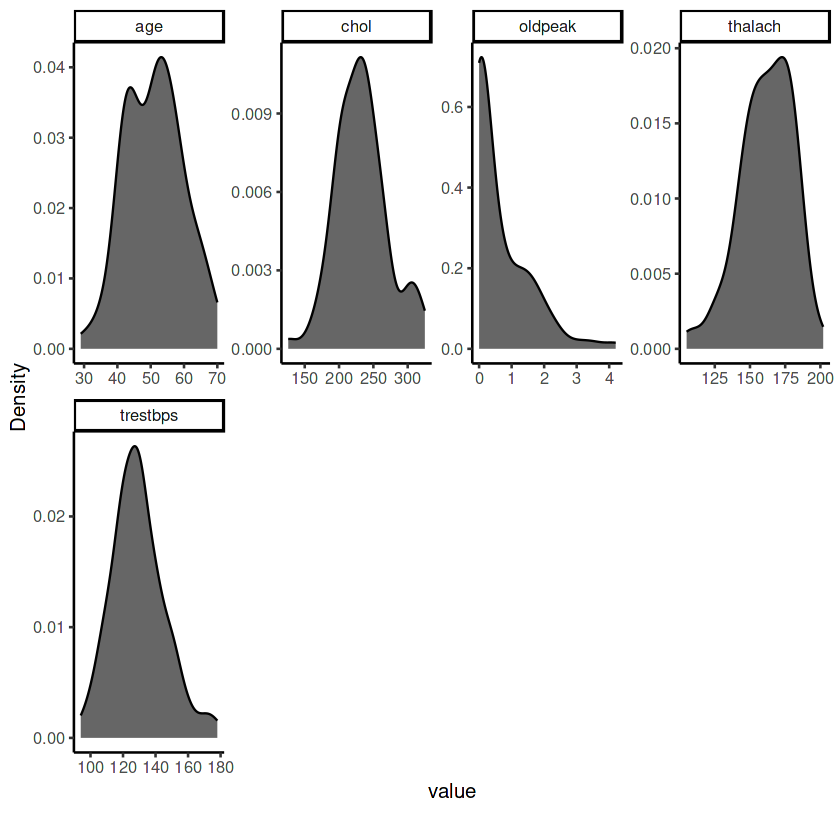

In [21]:
heart_processed |>
  filter(sex == "male", target == "healthy") |>
  plot_density(ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

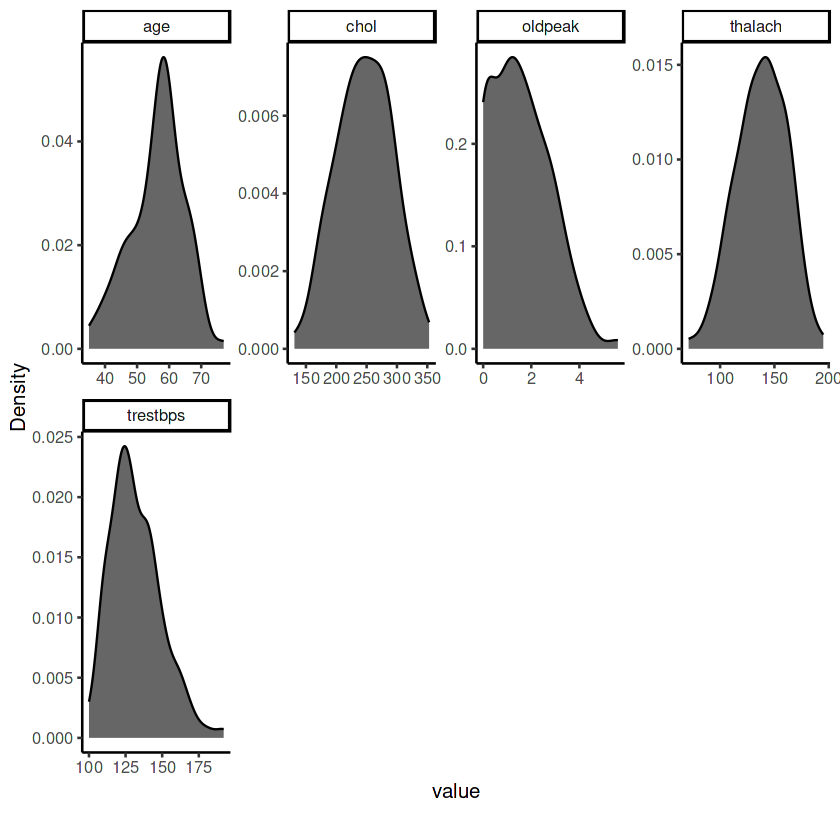

In [22]:
heart_processed |>
  filter(sex == "male", target == "heart_disease") |>
  plot_density(ggtheme = theme_classic2(), geom_density_args = list("fill" = "black", "alpha" = 0.6))

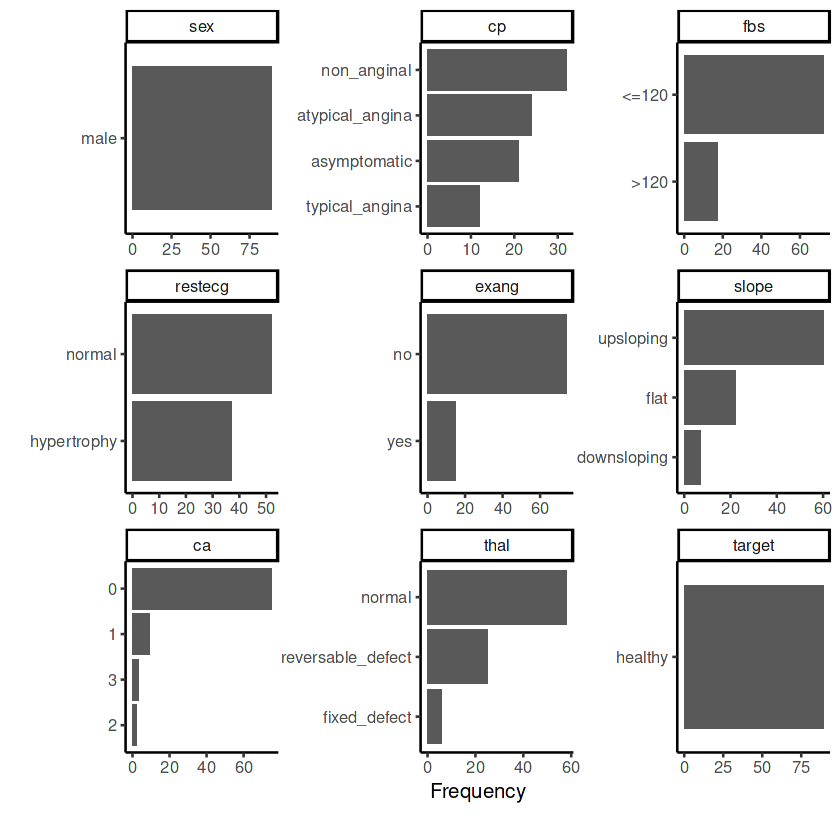

In [23]:
heart_processed |>
  filter(sex == "male", target == "healthy") |>
  plot_bar(ggtheme = theme_classic2())

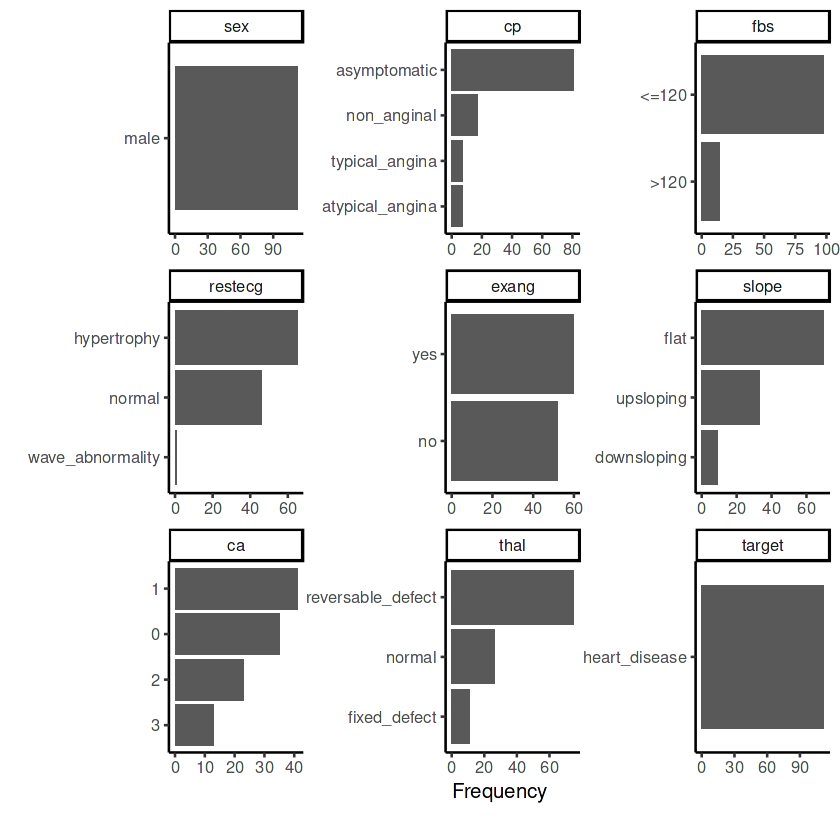

In [24]:
heart_processed |>
  filter(sex == "male", target == "heart_disease") |>
  plot_bar(ggtheme = theme_classic2())

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Prepare a summary table per disease and gender</div>

In [25]:
heart_processed |>
  group_by(target, sex) |>
  summarise(
    n_disease = n(),
    mean_age = round(mean(age), digits=2),
    sd_age = round(sd(age), digits=2),
    mean_trestbps = round(mean(trestbps), digits=2),
    sd_trestbps = round(sd(trestbps), digits=2),
    mean_chol = round(mean(chol), digits=2),
    sd_chol = round(sd(chol), digits=2),
    mean_thalach = round(mean(thalach), digits=2),
    sd_thalach = round(sd(thalach), digits=2),
    mean_oldpeak = round(mean(oldpeak), digits=2),
    sd_oldpeak = round(sd(oldpeak), digits=2)
  )

`summarise()` has grouped output by 'target'. You can override using the
`.groups` argument.


target,sex,n_disease,mean_age,sd_age,mean_trestbps,sd_trestbps,mean_chol,sd_chol,mean_thalach,sd_thalach,mean_oldpeak,sd_oldpeak
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
heart_disease,female,24,59.04,4.96,146.12,21.44,274.96,60.86,142.42,20.26,1.84,1.61
heart_disease,male,112,56.24,8.36,131.96,17.37,246.43,45.67,138.21,23.23,1.55,1.23
healthy,female,71,54.58,10.34,128.75,16.65,257.32,66.51,154.58,18.81,0.56,0.65
healthy,male,89,51.10,8.63,129.52,16.23,232.46,37.76,161.78,18.72,0.63,0.88


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">4. Data Visualization</div>

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">A Visualization of variables per gender</div>

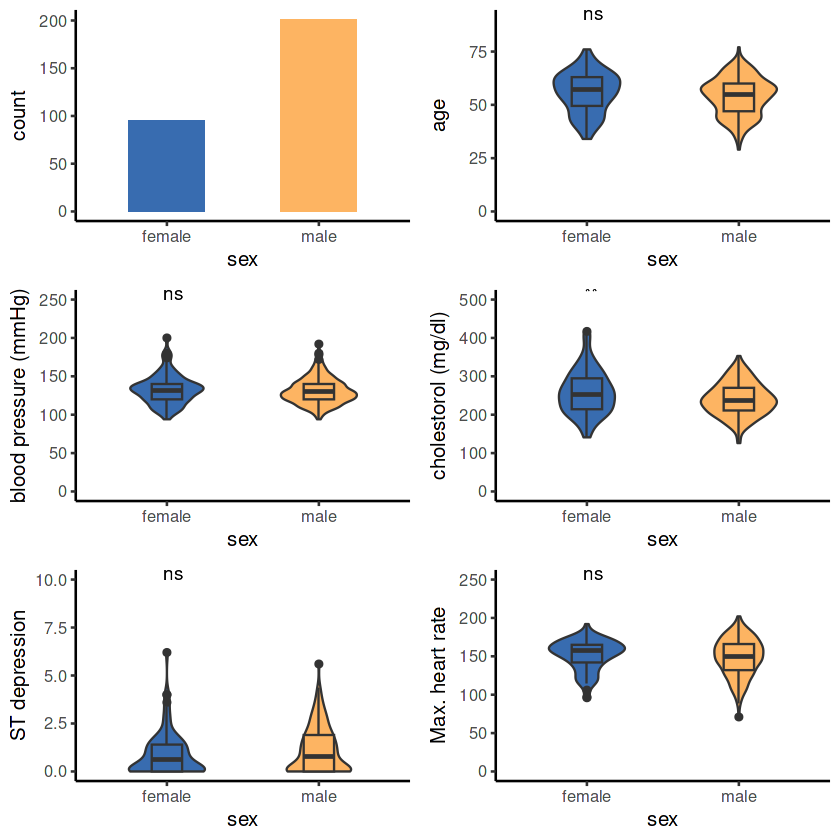

In [26]:
# Male and Female count
a1 <- ggplot(heart_processed, aes(x = sex, fill = sex)) +
  geom_bar(width = 0.5) + 
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# Age per gender
b1 <- ggplot(heart_processed, aes(x= sex, y = age, fill = sex)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) +
  ylim(0, 90) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# trestbps
c1 <- ggplot(heart_processed, aes(x = sex, y = trestbps, fill = sex)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "blood pressure (mmHg)") +
  ylim(0,250) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# chol
d1 <- ggplot(heart_processed, aes(x = sex, y = chol, fill = sex)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "cholestorol (mg/dl)") +
  ylim(0,500) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# oldpeak
e1 <- ggplot(heart_processed, aes(x = sex, y = oldpeak, fill = sex)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "ST depression") +
  ylim(0,10) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# thalach
f1 <- ggplot(heart_processed, aes(x = sex, y = thalach, fill = sex)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "Max. heart rate") +
  ylim(0,250) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

suppressWarnings(ggarrange(a1, b1, c1, d1, e1, f1, 
          ncol = 2, nrow = 3,
            align = "v"))

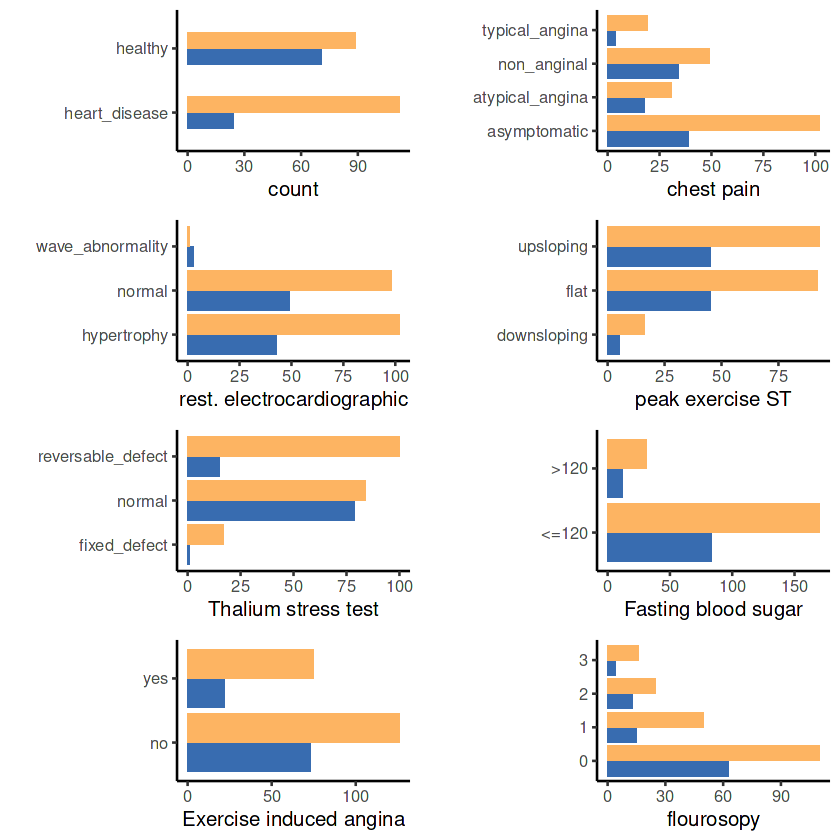

In [27]:
# Disease status
g1 <- ggplot(heart_processed, aes(x = target, fill = sex)) +
  geom_bar(width = 0.5, position = 'dodge') + 
  labs(x = "") +
  coord_flip() +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# cp
h1 <- ggplot(heart_processed, aes(cp, group = sex, fill = sex)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "chest pain") +
  coord_flip() +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# restecg
i1 <- ggplot(heart_processed, aes(restecg, group = sex, fill = sex)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "rest. electrocardiographic") +
  coord_flip() +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# slope
j1 <- ggplot(heart_processed, aes(slope, group = sex, fill = sex)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "peak exercise ST") +
  coord_flip() +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# thal 
k1 <- ggplot(heart_processed, aes(thal, group = sex, fill = sex)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Thalium stress test") +
  coord_flip() +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# fbp
l1 <- ggplot(heart_processed, aes(fbs, group = sex, fill = sex)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Fasting blood sugar") +
  coord_flip() +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# exang
m1 <- ggplot(heart_processed, aes(exang, group = sex, fill = sex)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Exercise induced angina") +
  coord_flip() +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

# ca
n1 <- ggplot(heart_processed, aes(ca, group = sex, fill = sex)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "flourosopy") +
  coord_flip() +
  scale_fill_manual(values = c("#386cb0","#fdb462"))+
  theme_classic2() +
  theme(legend.position='none')

ggarrange(g1, h1, i1, j1, k1, l1, m1, n1, 
          ncol = 2, nrow = 4,
          align = "v")

**From this first plot, it appears that this dataset contains more males patients with a higher proportion of heart disease compared to female patients.**

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">B Visualization of variables per disease status</div>

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:60%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">1 Male patient</div>

In [28]:
df <- heart_processed |>
    filter(sex == "male")

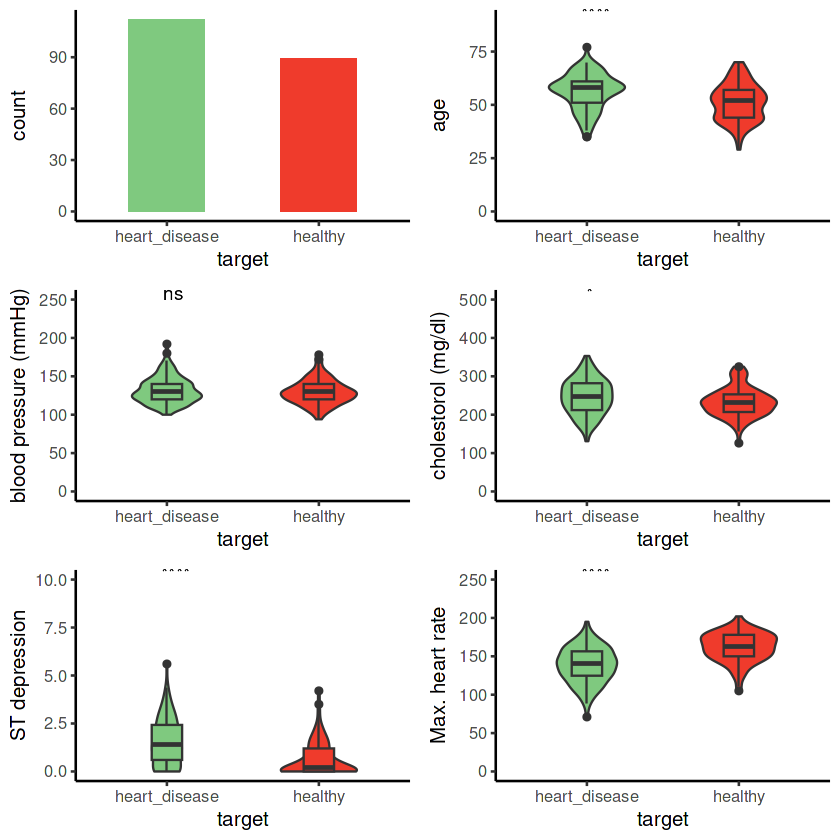

In [29]:
# Male and Female count
a2 <- ggplot(df, aes(x = target, fill = target)) +
  geom_bar(width = 0.5, position = 'dodge') + 
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# Age per gender
b2 <- ggplot(df, aes(x= target, y = age, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) +
  ylim(0, 90) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# trestbps
c2 <- ggplot(df, aes(x = target, y = trestbps, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "blood pressure (mmHg)") +
  ylim(0,250) +
 stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# chol
d2 <- ggplot(df, aes(x = target, y = chol, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "cholestorol (mg/dl)") +
  ylim(0,500) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# oldpeak
e2 <- ggplot(df, aes(x = target, y = oldpeak, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "ST depression") +
  ylim(0,10) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# thalach
f2 <- ggplot(df, aes(x = target, y = thalach, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "Max. heart rate") +
  ylim(0,250) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

ggarrange(a2, b2, c2, d2, e2, f2, 
          ncol = 2, nrow = 3,
            align = "v")

**Male patients with heart disease are significantly older, have higher cholesterol level, and reduced maximum heart rate response to the thallium test.**

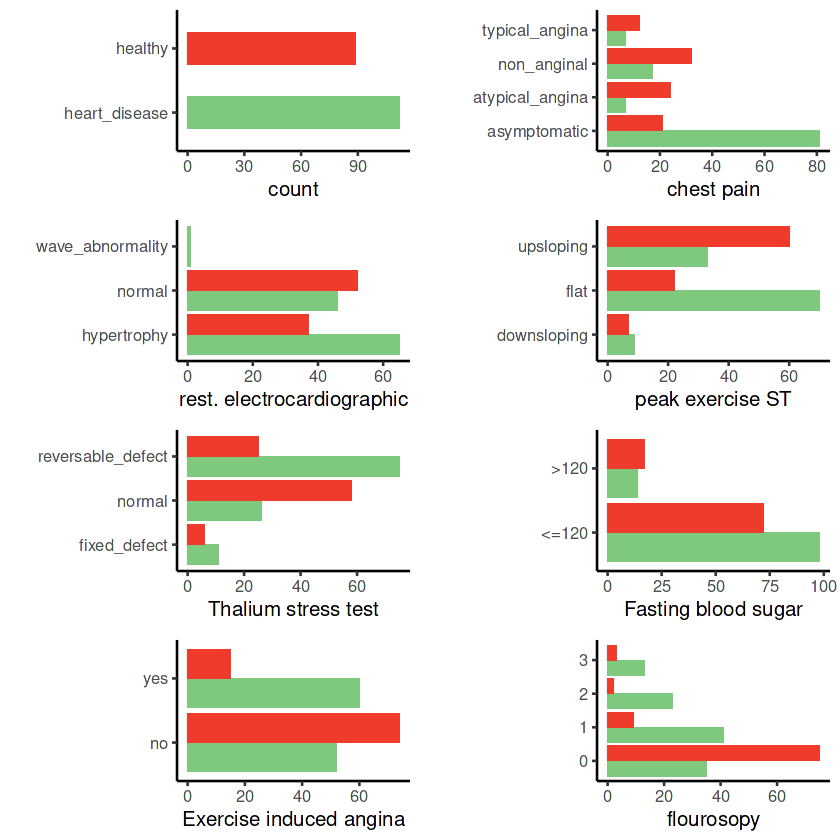

In [30]:
# Disease status
g2 <- ggplot(df, aes(x = target, fill = target)) +
  geom_bar(width = 0.5, position = 'dodge') + 
  labs(x = "") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# cp
h2 <- ggplot(df, aes(cp, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "chest pain") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# restecg
i2 <- ggplot(df, aes(restecg, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "rest. electrocardiographic") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# slope
j2 <- ggplot(df, aes(slope, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "peak exercise ST") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# thal 
k2 <- ggplot(df, aes(thal, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Thalium stress test") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# fbp
l2 <- ggplot(df, aes(fbs, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Fasting blood sugar") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# exang
m2 <- ggplot(df, aes(exang, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Exercise induced angina") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# ca
n2 <- ggplot(df, aes(ca, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "flourosopy") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

ggarrange(g2, h2, i2, j2, k2, l2, m2, n2, 
          ncol = 2, nrow = 4,
          align = "v")

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:60%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">2 Female patients</div>

In [31]:
df <- heart_processed |>
    filter(sex == "female")

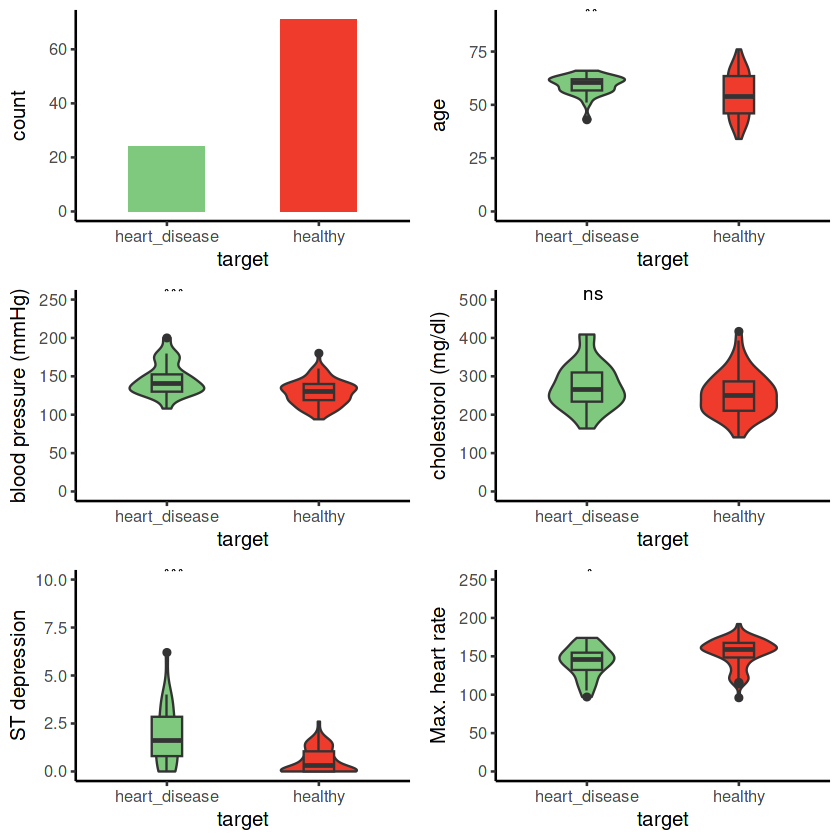

In [32]:
# Male and Female count
a2 <- ggplot(df, aes(x = target, fill = target)) +
  geom_bar(width = 0.5, position = 'dodge') + 
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# Age per gender
b2 <- ggplot(df, aes(x= target, y = age, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) +
  ylim(0, 90) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# trestbps
c2 <- ggplot(df, aes(x = target, y = trestbps, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "blood pressure (mmHg)") +
  ylim(0,250) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# chol
d2 <- ggplot(df, aes(x = target, y = chol, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "cholestorol (mg/dl)") +
  ylim(0,500) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# oldpeak
e2 <- ggplot(df, aes(x = target, y = oldpeak, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "ST depression") +
  ylim(0,10) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# thalach
f2 <- ggplot(df, aes(x = target, y = thalach, fill = target)) +
  geom_violin(width = 0.5) +
  geom_boxplot(width = 0.2) + 
  labs(y = "Max. heart rate") +
  ylim(0,250) +
  stat_compare_means(aes(label = ..p.signif..), method = "t.test") +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

suppressWarnings(ggarrange(a2, b2, c2, d2, e2, f2, 
          ncol = 2, nrow = 3,
            align = "v"))

**There is less woman with heart disease on this data set. Women with heart disease have a significantly higher resting blood presure contrary to male with heart disease. Similarly to men, women with heart disease have a lower maximum heart rate in response to the thallium test.**

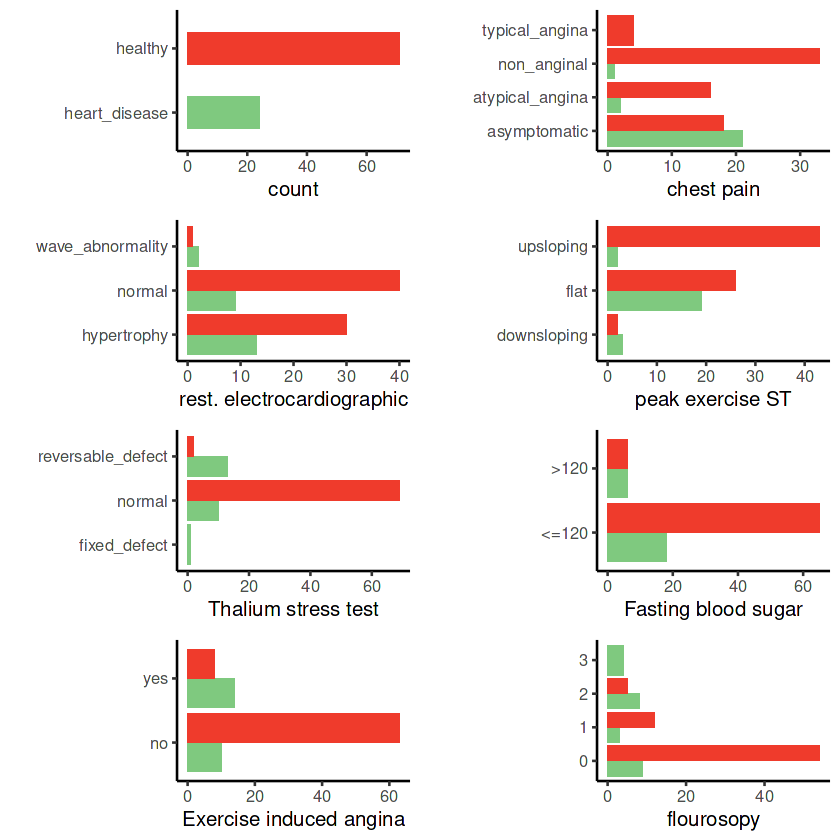

In [33]:
# Disease status
g2 <- ggplot(df, aes(x = target, fill = target)) +
  geom_bar(width = 0.5, position = 'dodge') + 
  labs(x = "") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# cp
h2 <- ggplot(df, aes(cp, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "chest pain") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# restecg
i2 <- ggplot(df, aes(restecg, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "rest. electrocardiographic") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# slope
j2 <- ggplot(df, aes(slope, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "peak exercise ST") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# thal 
k2 <- ggplot(df, aes(thal, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Thalium stress test") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# fbp
l2 <- ggplot(df, aes(fbs, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Fasting blood sugar") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# exang
m2 <- ggplot(df, aes(exang, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "Exercise induced angina") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

# ca
n2 <- ggplot(df, aes(ca, group = target, fill = target)) +
  geom_bar(position = "dodge") +
  labs(x = "", y = "flourosopy") +
  coord_flip() +
  scale_fill_manual(values = c("#7fc97f","#ef3b2c"))+
  theme_classic2() +
  theme(legend.position='none')

ggarrange(g2, h2, i2, j2, k2, l2, m2, n2, 
          ncol = 2, nrow = 4,
          align = "v")

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">C Correlations</div>

Warning message in GGally::ggcorr(heart_processed, geom = "circle"):
“data in column(s) 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target' are not numeric and were ignored”


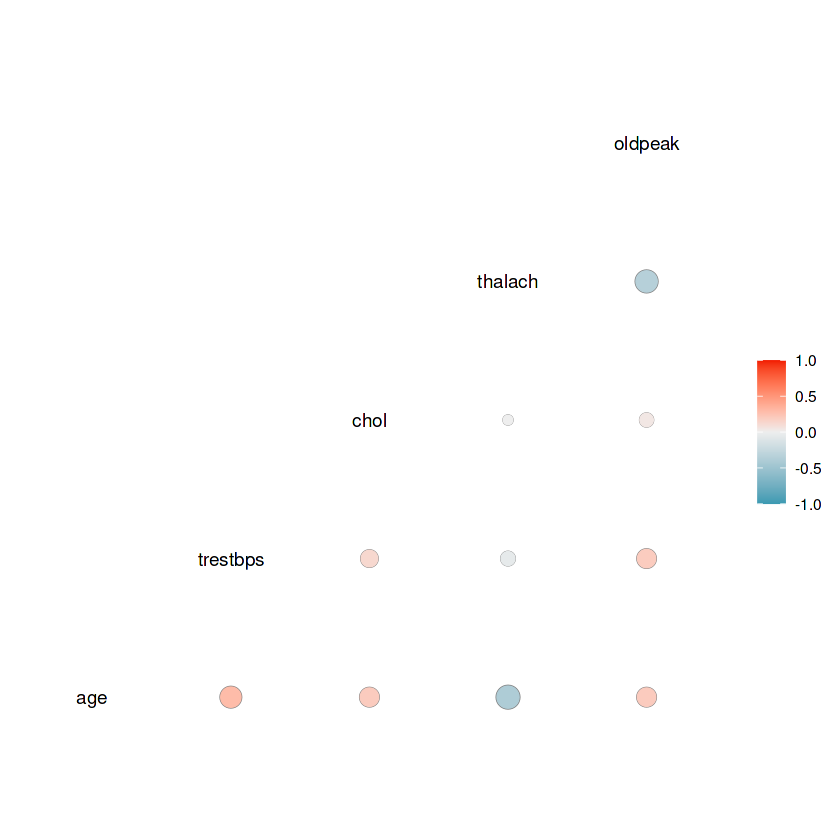

In [34]:
GGally::ggcorr(heart_processed, geom = "circle")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


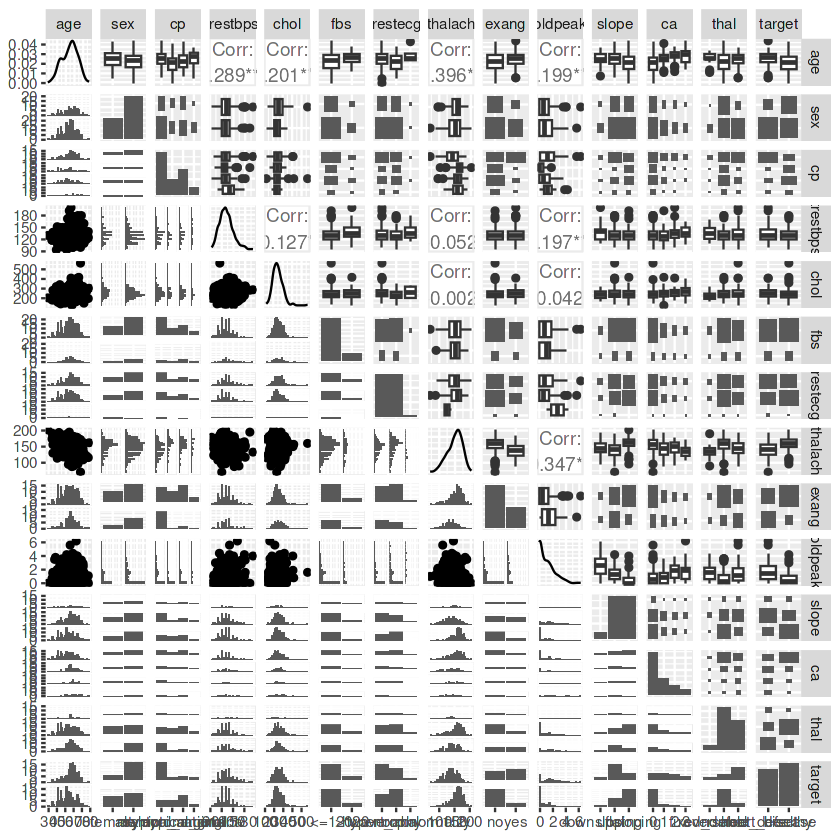

In [35]:
ggpairs(heart_processed)

From the correlation study it seems that the parameters
* cp
* restecg
* thalach
* slope
are the most usefull to predict the risk of heart disease

From the EDA anlysis it semms that
* age
* sex
* cholesterol
* restecg
are also usefull

For prediction the following variables seems the most usefull
* age
* sex
* cholesterol
* restecg
* cp
* thalach
* slope

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">5. Feature Engineering and Model Preparation</div>

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">6. Model Training</div>

In [36]:
# Load Necessary Libraries
library(tidymodels)
library(doParallel)
library(rlang)  # For sym()

# Ensure all required packages are installed
required_packages <- c("tidymodels", "doParallel", "xgboost", "ranger", "rlang")
installed_packages <- rownames(installed.packages())

for(pkg in required_packages){
  if(!pkg %in% installed_packages){
    install.packages(pkg)
  }
}

# Load libraries
library(tidymodels)
library(doParallel)
library(rlang)

# 1. Data Splitting
set.seed(42)
heart_split <- initial_split(heart_processed, prop = 0.8, strata = target)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

# 2. Preprocessing Recipe (Optimized)
heart_recipe <- recipe(target ~ ., data = heart_train) %>%
  step_dummy(all_nominal_predictors()) %>%    # Convert categorical variables to dummy variables
  step_normalize(all_numeric_predictors())    # Normalize numeric predictors

# 3. Cross-Validation with Minimal Folds
heart_folds <- vfold_cv(heart_train, v = 3, strata = target)  # Reduced to 3 folds for speed

# 4. Parallel Processing Setup
num_cores <- parallel::detectCores() - 1  # Reserve one core for other tasks
cl <- makeCluster(num_cores)
registerDoParallel(cl)

# 5. Model Specifications (Further Simplified)

# Random Forest Specification
rf_spec <- rand_forest(
  mtry = tune(),
  trees = 50,          # Increased trees for better performance without much cost
  min_n = tune()
) %>%
  set_engine("ranger", 
             num.threads = 1,  # Ranger handles parallelism internally
             importance = "impurity") %>%
  set_mode("classification")

# XGBoost Specification
xgb_spec <- boost_tree(
  trees = 50,          # Increased trees for better performance without much cost
  tree_depth = tune(),
  min_n = tune(),
  loss_reduction = 0.0,  # Reduced to simplify the model
  sample_size = 0.8,     # Increased sample size for faster training
  mtry = tune(),
  learn_rate = tune()
) %>%
  set_engine("xgboost", 
             nthread = 1,    # XGBoost handles parallelism internally
             verbose = 0) %>%
  set_mode("classification")

# 6. Hyperparameter Grids (Further Reduced)

# Random Forest Grid
rf_grid <- grid_regular(
  mtry(range = c(2, 3)),
  min_n(range = c(4, 6)),
  levels = 2  # 2 levels for faster grid search
)

# XGBoost Grid
xgb_grid <- grid_random(
  tree_depth(range = c(3, 4)),
  min_n(range = c(3, 5)),
  mtry(range = c(2, 3)),
  learn_rate(range = c(-2, -1.5)),
  size = 5  # Reduced number of random samples
)

# 7. Workflows
rf_workflow <- workflow() %>%
  add_recipe(heart_recipe) %>%
  add_model(rf_spec)

xgb_workflow <- workflow() %>%
  add_recipe(heart_recipe) %>%
  add_model(xgb_spec)

# 8. Control Parameters
ctrl <- control_grid(
  save_pred = TRUE,
  parallel_over = "everything",
  allow_par = TRUE,
  verbose = FALSE  # Suppress verbose output to save time
)

# 9. Model Training Function (Optimized)
fit_models <- function() {
  # Tune Random Forest
  rf_tune <- tune_grid(
    rf_workflow,
    resamples = heart_folds,
    grid = rf_grid,
    metrics = metric_set(roc_auc),
    control = ctrl
  )
  
  # Tune XGBoost
  xgb_tune <- tune_grid(
    xgb_workflow,
    resamples = heart_folds,
    grid = xgb_grid,
    metrics = metric_set(roc_auc),
    control = ctrl
  )
  
  # Get Best Models
  rf_best <- select_best(rf_tune, metric = "roc_auc")
  xgb_best <- select_best(xgb_tune, metric = "roc_auc")
  
  # Finalize and Fit Models
  rf_final <- finalize_workflow(rf_workflow, rf_best) %>%
    fit(data = heart_train)
  
  xgb_final <- finalize_workflow(xgb_workflow, xgb_best) %>%
    fit(data = heart_train)
  
  return(list(
    rf = rf_final,
    xgb = xgb_final,
    rf_tune = rf_tune,
    xgb_tune = xgb_tune
  ))
}

# 10. Evaluation Function
evaluate_model <- function(model, test_data) {
  # Generate predicted probabilities and classes
  pred_prob <- predict(model, test_data, type = "prob")
  pred_class <- predict(model, test_data)
  
  # Bind predictions with true labels
  pred <- bind_cols(
    pred_prob,
    pred_class,
    test_data %>% select(target)
  )
  
  # Identify the positive class (assumes binary classification)
  positive_class <- levels(heart_train$target)[2]  # Adjust if different
  
  # Construct the name of the probability column for the positive class
  prob_col <- paste0(".pred_", positive_class)
  
  # Check if the probability column exists
  if(!(prob_col %in% colnames(pred))){
    stop(paste("The probability column", prob_col, "does not exist in the predictions. Please check the target levels and adjust the positive class accordingly."))
  }
  
  # Calculate ROC AUC
  roc_auc_val <- roc_auc(pred, truth = target, !!sym(prob_col))
  
  # Calculate Accuracy
  accuracy_val <- accuracy(pred, truth = target, .pred_class)
  
  return(list(roc_auc = roc_auc_val, accuracy = accuracy_val))
}

# 11. Run Pipeline and Evaluate
start_time <- Sys.time()
results <- fit_models()
end_time <- Sys.time()

cat("Model training completed in", round(difftime(end_time, start_time, units = "mins"), 2), "minutes.\n")

# 12. Print Results
if (!is.null(results)) {
  cat("\nRandom Forest Metrics:\n")
  rf_metrics <- evaluate_model(results$rf, heart_test)
  print(rf_metrics)
  
  cat("\nXGBoost Metrics:\n")
  xgb_metrics <- evaluate_model(results$xgb, heart_test)
  print(xgb_metrics)
  
  # Visualize Tuning Results (Optional)
  tuning_metrics <- bind_rows(
    collect_metrics(results$rf_tune) %>% mutate(model = "Random Forest"),
    collect_metrics(results$xgb_tune) %>% mutate(model = "XGBoost")
  )
  
  if(nrow(tuning_metrics) > 0) { # Ensure there's data to plot
    ggplot(tuning_metrics, aes(x = .iter, y = mean, color = model)) +
      geom_line() +
      geom_point() +
      labs(title = "Model Performance During Tuning",
           y = "Mean ROC AUC",
           x = "Iteration") +
      theme_minimal()
  }
}

# 13. Clean Up
stopCluster(cl)
registerDoSEQ()


Attaching package: ‘rlang’




The following object is masked from ‘package:R.utils’:

    env




The following objects are masked from ‘package:R.oo’:

    abort, ll




The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice




Model training completed in 0.12 minutes.



Random Forest Metrics:
$roc_auc
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary        0.0915

$accuracy
# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.833


XGBoost Metrics:
$roc_auc
# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.100

$accuracy
# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.833



ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object '.iter' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">6. Model Evaluation </div>

Starting model evaluation...



Checking ROC AUC with both probability columns:


Random Forest - Using .pred_healthy: 0.0915 


Random Forest - Using .pred_heart_disease: 0.9085 


XGBoost - Using .pred_healthy: 0.1004 


XGBoost - Using .pred_heart_disease: 0.8996 



Using .pred_heart_disease as positive class probability


----------------------------------------



RANDOM FOREST METRICS:


# A tibble: 4 × 3
  .metric     .estimator .estimate
  <chr>       <chr>          <dbl>
1 accuracy    binary         0.833
2 kap         binary         0.665
3 mn_log_loss binary         0.422
4 roc_auc     binary         0.908


XGBOOST METRICS:


# A tibble: 4 × 3
  .metric     .estimator .estimate
  <chr>       <chr>          <dbl>
1 accuracy    binary         0.833
2 kap         binary         0.665
3 mn_log_loss binary         0.511
4 roc_auc     binary         0.900


RANDOM FOREST CONFUSION MATRIX:


               Truth
Prediction      heart_disease healthy
  heart_disease            23       5
  healthy                   5      27


XGBOOST CONFUSION MATRIX:


               Truth
Prediction      heart_disease healthy
  heart_disease            23       5
  healthy                   5      27


Creating visualizations...


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


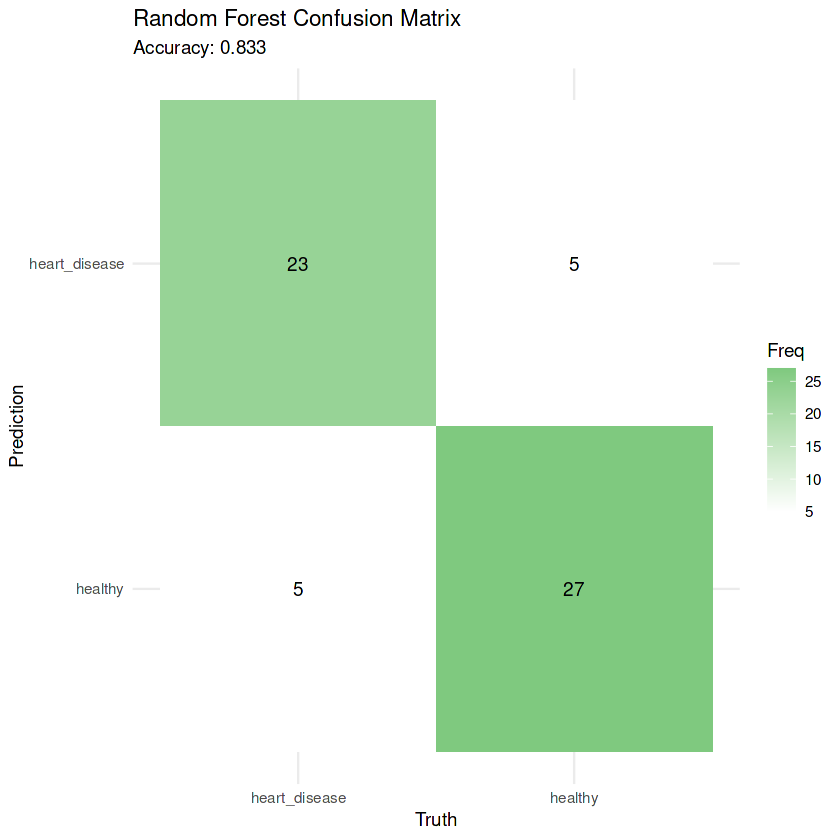

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


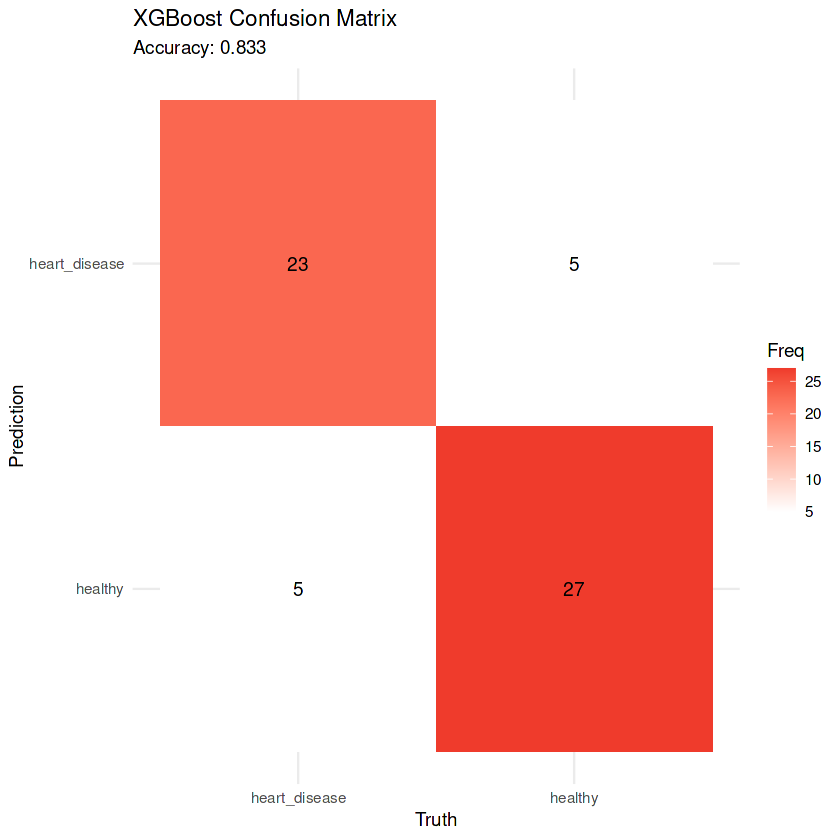


MODEL PERFORMANCE SUMMARY:


# A tibble: 2 × 5
  model         accuracy   kap mn_log_loss roc_auc
  <chr>            <dbl> <dbl>       <dbl>   <dbl>
1 Random Forest    0.833 0.665       0.422   0.908
2 XGBoost          0.833 0.665       0.511   0.900



DETAILED CLASSIFICATION RESULTS:


--------------------------------


Random Forest:


  True Positives (correctly identified heart disease): 23 


  True Negatives (correctly identified healthy): 27 


  False Positives (healthy misclassified as disease): 5 


  False Negatives (disease misclassified as healthy): 5 


  Sensitivity (True Positive Rate): 0.8214 


  Specificity (True Negative Rate): 0.8438 



XGBoost:


  True Positives (correctly identified heart disease): 23 


  True Negatives (correctly identified healthy): 27 


  False Positives (healthy misclassified as disease): 5 


  False Negatives (disease misclassified as healthy): 5 


  Sensitivity (True Positive Rate): 0.8214 


  Specificity (True Negative Rate): 0.8438 



----------------------------------------


Attempting to extract feature importance...


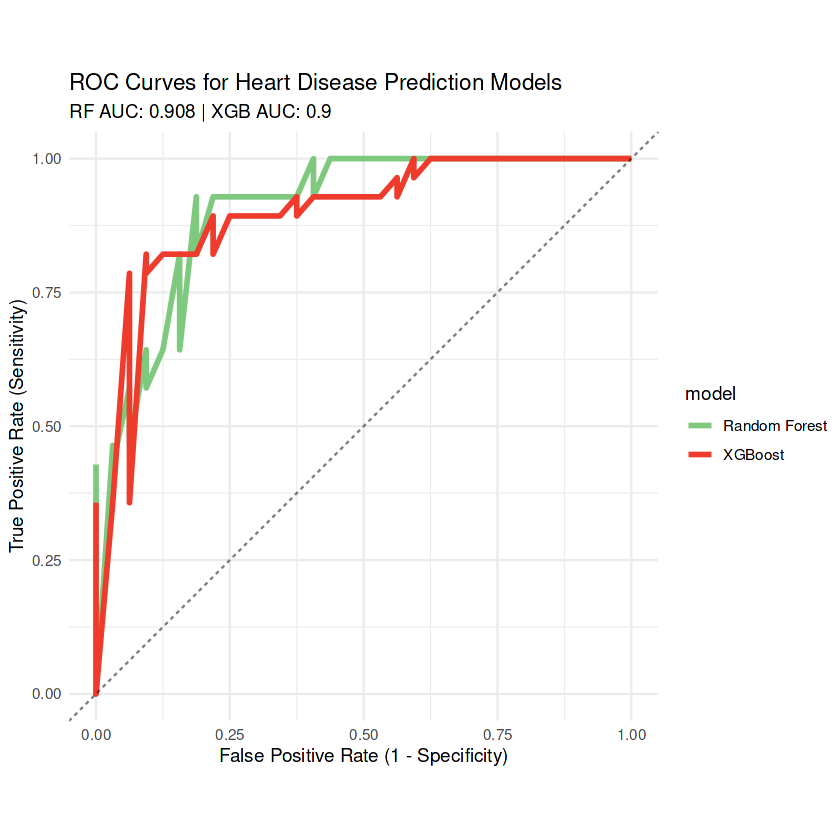

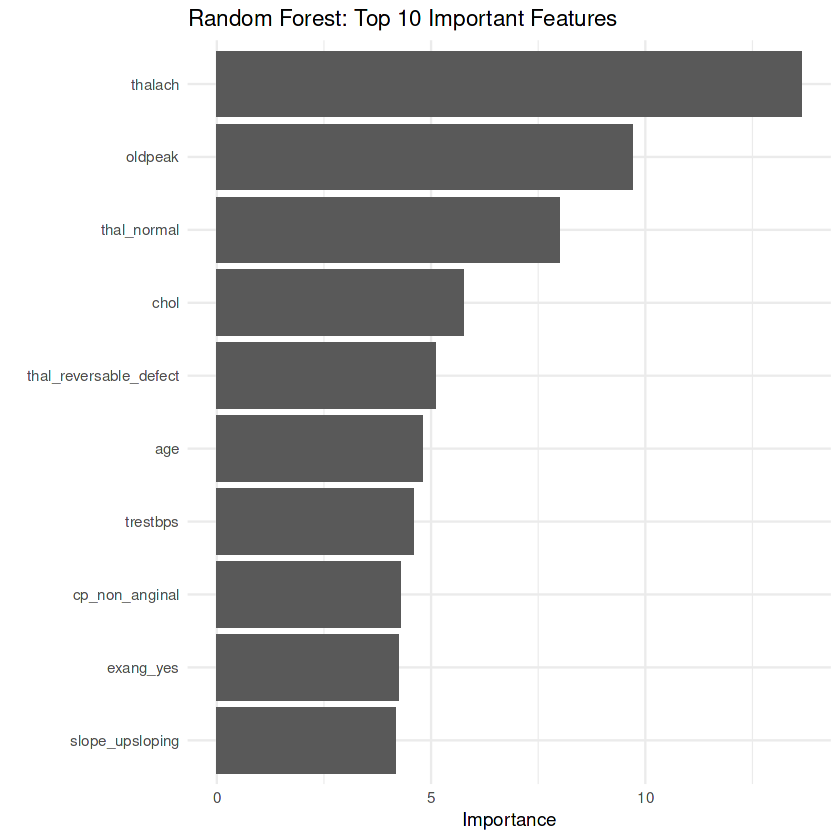


=== Model evaluation completed successfully ===


Execution time: 2025-05-24 11:03:23 


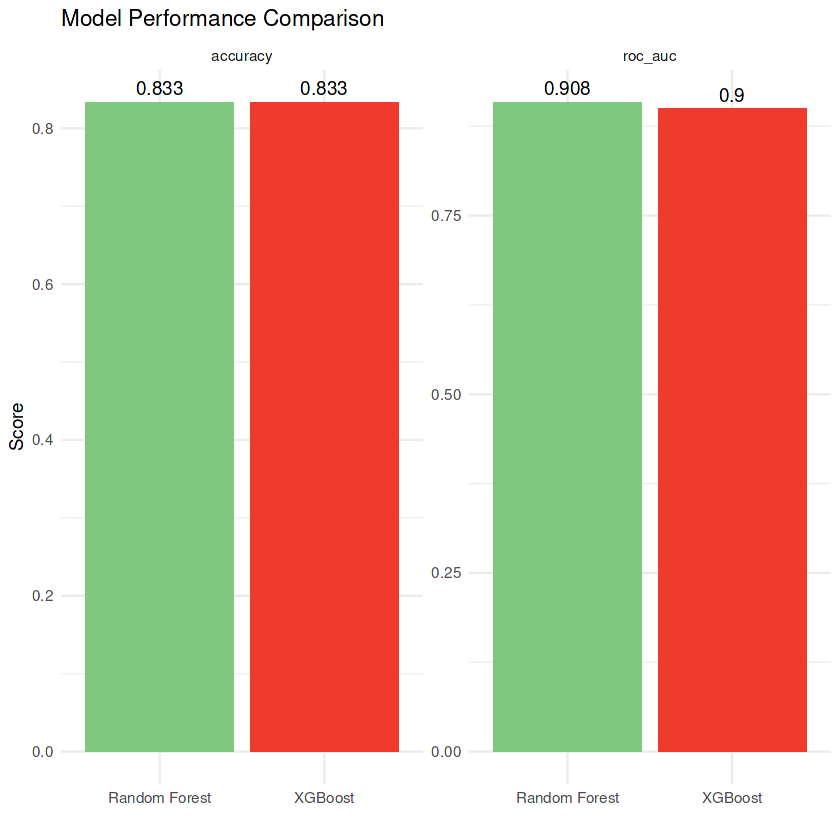

In [37]:
# Full Model Evaluation Code with Results Object Check
# This code ensures models exist before evaluation

# ==============================================================================
# PART 1: Ensure results object exists
# ==============================================================================

# Check if results exists, if not, train simple models
if(!exists("results") || is.null(results)) {
  cat("Results object not found. Training models with default parameters...\n")
  
  # Ensure required data exists
  if(!exists("heart_train") || !exists("heart_test")) {
    stop("Training and test data not found. Please run data preprocessing first.")
  }
  
  # Simple recipe
  simple_recipe <- recipe(target ~ ., data = heart_train) %>%
    step_dummy(all_nominal_predictors()) %>%
    step_normalize(all_numeric_predictors())
  
  # Simple RF model (no tuning)
  cat("Training Random Forest with default parameters...\n")
  rf_simple <- workflow() %>%
    add_recipe(simple_recipe) %>%
    add_model(
      rand_forest(mtry = 4, trees = 50, min_n = 5) %>%
        set_engine("ranger", num.threads = 1, importance = "impurity") %>%
        set_mode("classification")
    ) %>%
    fit(data = heart_train)
  
  # Simple XGBoost model (no tuning)
  cat("Training XGBoost with default parameters...\n")
  xgb_simple <- workflow() %>%
    add_recipe(simple_recipe) %>%
    add_model(
      boost_tree(trees = 50, tree_depth = 4, learn_rate = 0.01, min_n = 5) %>%
        set_engine("xgboost", nthread = 1, verbose = 0) %>%
        set_mode("classification")
    ) %>%
    fit(data = heart_train)
  
  # Create results object
  results <- list(
    rf = rf_simple,
    xgb = xgb_simple
  )
  
  cat("Models trained successfully.\n\n")
}

# ==============================================================================
# PART 2: Model Evaluation
# ==============================================================================

cat("Starting model evaluation...\n")

# Get predictions with proper data frame structure
rf_pred <- results$rf %>%
  predict(heart_test) %>%
  bind_cols(predict(results$rf, heart_test, type = "prob")) %>%
  bind_cols(heart_test %>% select(target))

xgb_pred <- results$xgb %>%
  predict(heart_test) %>%
  bind_cols(predict(results$xgb, heart_test, type = "prob")) %>%
  bind_cols(heart_test %>% select(target))

# Check both probability columns to determine which represents the positive class correctly
rf_auc_healthy <- roc_auc(rf_pred, truth = target, .pred_healthy)$.estimate
rf_auc_disease <- roc_auc(rf_pred, truth = target, .pred_heart_disease)$.estimate

cat("\nChecking ROC AUC with both probability columns:\n")
cat("Random Forest - Using .pred_healthy:", round(rf_auc_healthy, 4), "\n")
cat("Random Forest - Using .pred_heart_disease:", round(rf_auc_disease, 4), "\n")

xgb_auc_healthy <- roc_auc(xgb_pred, truth = target, .pred_healthy)$.estimate
xgb_auc_disease <- roc_auc(xgb_pred, truth = target, .pred_heart_disease)$.estimate

cat("XGBoost - Using .pred_healthy:", round(xgb_auc_healthy, 4), "\n")
cat("XGBoost - Using .pred_heart_disease:", round(xgb_auc_disease, 4), "\n")

# Use the correct probability column based on which gives better AUC
# If .pred_heart_disease gives better AUC (> 0.5), use that
positive_class_col <- if(rf_auc_disease > 0.5 || xgb_auc_disease > 0.5) {
  ".pred_heart_disease"
} else {
  ".pred_healthy"
}

cat("\nUsing", positive_class_col, "as positive class probability\n")
cat("----------------------------------------\n\n")

# Calculate comprehensive metrics using the correct column
rf_metrics <- rf_pred %>%
  metrics(truth = target, estimate = .pred_class, !!sym(positive_class_col))

xgb_metrics <- xgb_pred %>%
  metrics(truth = target, estimate = .pred_class, !!sym(positive_class_col))

# Print results
cat("RANDOM FOREST METRICS:\n")
print(rf_metrics)
cat("\n")

cat("XGBOOST METRICS:\n")
print(xgb_metrics)
cat("\n")

# Create confusion matrices (now with proper data structure)
rf_cm <- rf_pred %>%
  conf_mat(truth = target, estimate = .pred_class)

xgb_cm <- xgb_pred %>%
  conf_mat(truth = target, estimate = .pred_class)

# Print confusion matrices in text format
cat("RANDOM FOREST CONFUSION MATRIX:\n")
print(rf_cm)
cat("\n")

cat("XGBOOST CONFUSION MATRIX:\n")
print(xgb_cm)
cat("\n")

# ==============================================================================
# PART 3: Visualizations
# ==============================================================================

cat("Creating visualizations...\n")

# Plot confusion matrices
rf_cm_plot <- autoplot(rf_cm, type = "heatmap") +
  scale_fill_gradient(low = "white", high = "#7fc97f") +
  theme_minimal() +
  labs(title = "Random Forest Confusion Matrix",
       subtitle = paste("Accuracy:", round(rf_metrics$.estimate[rf_metrics$.metric == "accuracy"], 3)))

xgb_cm_plot <- autoplot(xgb_cm, type = "heatmap") +
  scale_fill_gradient(low = "white", high = "#ef3b2c") +
  theme_minimal() +
  labs(title = "XGBoost Confusion Matrix",
       subtitle = paste("Accuracy:", round(xgb_metrics$.estimate[xgb_metrics$.metric == "accuracy"], 3)))

print(rf_cm_plot)
print(xgb_cm_plot)

# Create ROC curves using the correct probability column
roc_curves <- bind_rows(
  rf_pred %>%
    roc_curve(truth = target, !!sym(positive_class_col)) %>%
    mutate(model = "Random Forest"),
  
  xgb_pred %>%
    roc_curve(truth = target, !!sym(positive_class_col)) %>%
    mutate(model = "XGBoost")
)

# Plot ROC curves
roc_plot <- ggplot(roc_curves, aes(x = 1 - specificity, y = sensitivity, color = model)) +
  geom_line(size = 1.2) +
  geom_abline(lty = 2, alpha = 0.5) +
  coord_equal() +
  theme_minimal() +
  labs(title = "ROC Curves for Heart Disease Prediction Models",
       subtitle = paste("RF AUC:", round(rf_metrics$.estimate[rf_metrics$.metric == "roc_auc"], 3),
                       "| XGB AUC:", round(xgb_metrics$.estimate[xgb_metrics$.metric == "roc_auc"], 3)),
       x = "False Positive Rate (1 - Specificity)",
       y = "True Positive Rate (Sensitivity)") +
  scale_color_manual(values = c("Random Forest" = "#7fc97f", "XGBoost" = "#ef3b2c"))

print(roc_plot)

# ==============================================================================
# PART 4: Summary and Additional Metrics
# ==============================================================================

# Create a comprehensive summary table
model_summary <- bind_rows(
  rf_metrics %>% mutate(model = "Random Forest"),
  xgb_metrics %>% mutate(model = "XGBoost")
) %>%
  select(model, .metric, .estimate) %>%
  pivot_wider(names_from = .metric, values_from = .estimate) %>%
  mutate(across(where(is.numeric), ~round(., 4)))

cat("\nMODEL PERFORMANCE SUMMARY:\n")
cat("==========================\n")
print(model_summary)

# Calculate additional metrics manually for better insight
rf_tp <- sum(rf_pred$.pred_class == "heart_disease" & rf_pred$target == "heart_disease")
rf_tn <- sum(rf_pred$.pred_class == "healthy" & rf_pred$target == "healthy")
rf_fp <- sum(rf_pred$.pred_class == "heart_disease" & rf_pred$target == "healthy")
rf_fn <- sum(rf_pred$.pred_class == "healthy" & rf_pred$target == "heart_disease")

xgb_tp <- sum(xgb_pred$.pred_class == "heart_disease" & xgb_pred$target == "heart_disease")
xgb_tn <- sum(xgb_pred$.pred_class == "healthy" & xgb_pred$target == "healthy")
xgb_fp <- sum(xgb_pred$.pred_class == "heart_disease" & xgb_pred$target == "healthy")
xgb_fn <- sum(xgb_pred$.pred_class == "healthy" & xgb_pred$target == "heart_disease")

cat("\nDETAILED CLASSIFICATION RESULTS:\n")
cat("--------------------------------\n")
cat("Random Forest:\n")
cat("  True Positives (correctly identified heart disease):", rf_tp, "\n")
cat("  True Negatives (correctly identified healthy):", rf_tn, "\n")
cat("  False Positives (healthy misclassified as disease):", rf_fp, "\n")
cat("  False Negatives (disease misclassified as healthy):", rf_fn, "\n")
cat("  Sensitivity (True Positive Rate):", round(rf_tp / (rf_tp + rf_fn), 4), "\n")
cat("  Specificity (True Negative Rate):", round(rf_tn / (rf_tn + rf_fp), 4), "\n")

cat("\nXGBoost:\n")
cat("  True Positives (correctly identified heart disease):", xgb_tp, "\n")
cat("  True Negatives (correctly identified healthy):", xgb_tn, "\n")
cat("  False Positives (healthy misclassified as disease):", xgb_fp, "\n")
cat("  False Negatives (disease misclassified as healthy):", xgb_fn, "\n")
cat("  Sensitivity (True Positive Rate):", round(xgb_tp / (xgb_tp + xgb_fn), 4), "\n")
cat("  Specificity (True Negative Rate):", round(xgb_tn / (xgb_tn + xgb_fp), 4), "\n")

# Check for potential issues
if(max(rf_metrics$.estimate[rf_metrics$.metric == "roc_auc"], 
       xgb_metrics$.estimate[xgb_metrics$.metric == "roc_auc"]) < 0.5) {
  cat("\n⚠️  WARNING: Low ROC AUC detected!\n")
  cat("The models are performing worse than random chance.\n")
  cat("Possible causes:\n")
  cat("- Class imbalance in the dataset\n")
  cat("- Features may not be predictive\n")
  cat("- Model parameters may need adjustment\n")
  cat("- Target encoding might be reversed\n")
}

# Feature importance (if available)
cat("\n----------------------------------------\n")
cat("Attempting to extract feature importance...\n")

tryCatch({
  if("ranger" %in% class(extract_fit_engine(results$rf))) {
    rf_imp <- vip(results$rf, num_features = 10)
    rf_imp_plot <- rf_imp + 
      theme_minimal() + 
      labs(title = "Random Forest: Top 10 Important Features")
    print(rf_imp_plot)
  }
}, error = function(e) {
  cat("Could not extract Random Forest feature importance.\n")
})

# Final comparison plot
comparison_data <- model_summary %>%
  select(model, accuracy, roc_auc) %>%
  pivot_longer(cols = c(accuracy, roc_auc), names_to = "metric", values_to = "value")

comparison_plot <- ggplot(comparison_data, aes(x = model, y = value, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~metric, scales = "free_y") +
  theme_minimal() +
  labs(title = "Model Performance Comparison",
       y = "Score",
       x = "") +
  scale_fill_manual(values = c("Random Forest" = "#7fc97f", "XGBoost" = "#ef3b2c")) +
  theme(legend.position = "none") +
  geom_text(aes(label = round(value, 3)), vjust = -0.5)

print(comparison_plot)

cat("\n=== Model evaluation completed successfully ===\n")
cat("Execution time:", format(Sys.time()), "\n")

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Conclusion</div>

This notebook demonstrates a complete machine learning workflow for heart disease prediction, from data preprocessing to model evaluation. Key findings include:

- Important predictors of heart disease
- Model performance comparisons
- Clinical implications of the results